In [2]:
#importing libraries gto perfrom EDA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
warnings.filterwarnings(action = 'ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
#imported CSV data
df1=pd.read_csv('application_data.csv')
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#just checked the  values of all the columns 
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
#total null values
df1.isnull().sum().sum()

9152465

In [7]:
#total data count
df1.shape

(307511, 122)

In [ ]:
#null values with columns
null_count_ser = pd.isnull(df1).sum()
null_count_ser.head(122)

In [ ]:
#check number of columns whoch have null values
print("No. of columns containing null values")
print(len(df1.columns[df1.isna().any()]))

In [ ]:
#checking the columns types 
df1.info(verbose=True)

In [ ]:
#dropping columns which has null values more than 40 %
drop_cols = list(df1.columns[100.0*df1.isnull().mean()>40])
drop_cols

In [ ]:
#dropping columns
df1 = df1.drop(drop_cols,axis =1)
df1

In [ ]:
len(drop_cols)

In [ ]:
df1.shape

In [ ]:
len(df1)

In [ ]:
#higlighting of the columns which has null values
df1.isna().sum().sort_values(ascending=False).pipe(lambda x: x[x > 0])

In [ ]:
#deleting the un-necessary columns
not_required_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','EXT_SOURCE_2','EXT_SOURCE_3',
        'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
        'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
        'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
        'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_GOODS_PRICE','NAME_TYPE_SUITE']

df1.drop(labels=not_required_columns,axis=1,inplace=True)

In [ ]:
#final output columns

df1.head()

In [ ]:
df1.shape

In [ ]:
df1.describe()

In [ ]:
#higlighting of the columns which has null values
df1.isna().sum().sort_values(ascending=False).pipe(lambda x: x[x > 0])

In [ ]:
# SK_ID is int-data type and it has customer number and we cannot manupliate it so converting the data type to object data type
df1['SK_ID_CURR'] = df1['SK_ID_CURR'].astype('object')

In [ ]:
df1.info()

# AMT_ANNUITY

#removing the null values from AMT_ANNUITY


In [ ]:
df1.AMT_ANNUITY.isnull().sum()

In [ ]:
float(100.0*12/307511)

In [ ]:
df1.AMT_ANNUITY.describe()

In [26]:
print(df1.AMT_ANNUITY.mean())
print(df1.AMT_ANNUITY.median())
print(df1.AMT_ANNUITY.mode()[0])
print(type(df1.AMT_ANNUITY.mode()))

27108.573909183444
24903.0
9000.0
<class 'pandas.core.series.Series'>


<AxesSubplot:xlabel='AMT_ANNUITY'>

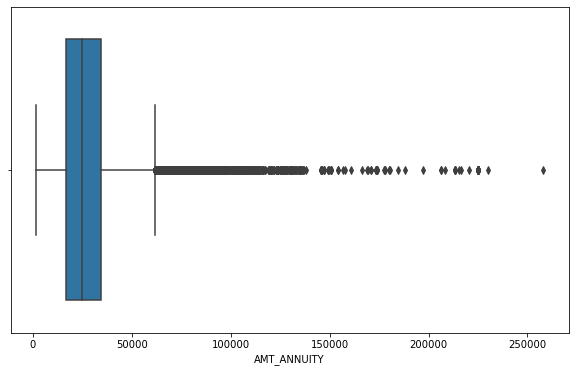

In [27]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(df1.AMT_ANNUITY)

In [28]:
med=df1["AMT_ANNUITY"].median()
df1["AMT_ANNUITY"]=df1["AMT_ANNUITY"].fillna(med)

In [29]:
df1["AMT_ANNUITY"] = df1["AMT_ANNUITY"].map(lambda x: 50000 if x > 50000 else x)

<AxesSubplot:xlabel='AMT_ANNUITY'>

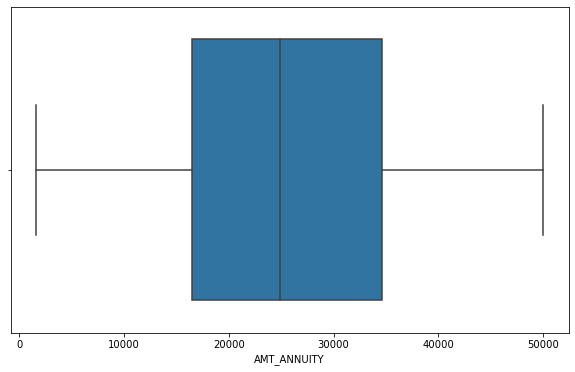

In [30]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(df1.AMT_ANNUITY)

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

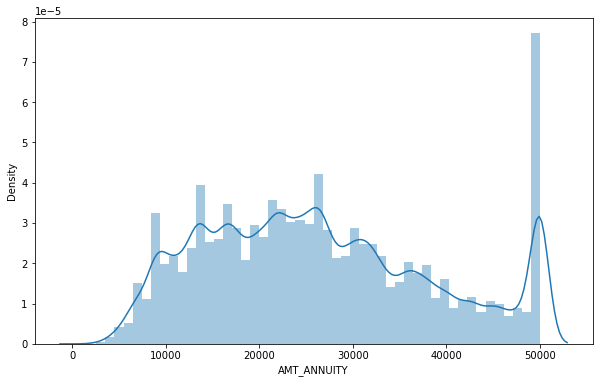

In [31]:
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(df1.AMT_ANNUITY)

In [32]:
df1.isna().sum().sort_values(ascending=False).pipe(lambda x: x[x > 0])

OCCUPATION_TYPE    96391
dtype: int64

# OCCUPATION_TYPE

#removing the null values

In [33]:
df1.OCCUPATION_TYPE.isnull().sum()

96391

In [34]:
float(100.0*96391/307511)

31.345545362604916

In [35]:
df1.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [36]:
df1.OCCUPATION_TYPE.value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [37]:
df1.OCCUPATION_TYPE.isnull().sum()

96391

<AxesSubplot:>

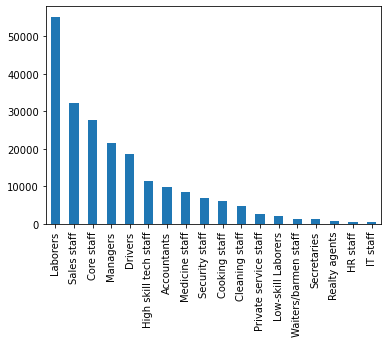

In [38]:
df1.OCCUPATION_TYPE.value_counts().plot.bar()

In [39]:
df1.OCCUPATION_TYPE = df1.OCCUPATION_TYPE.fillna("Others")

<AxesSubplot:>

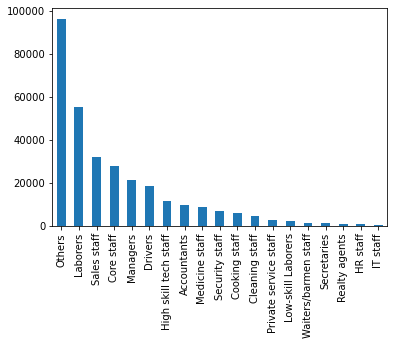

In [40]:
df1.OCCUPATION_TYPE.value_counts().plot.bar()

In [41]:
OCCUPATION_TYPE = df1.OCCUPATION_TYPE.value_counts(normalize= True)*100
OCCUPATION_TYPE

Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [42]:
df1.OCCUPATION_TYPE.describe()

count     307511
unique        19
top       Others
freq       96391
Name: OCCUPATION_TYPE, dtype: object

# AMT_CREDIT

In [43]:
df1.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT'>

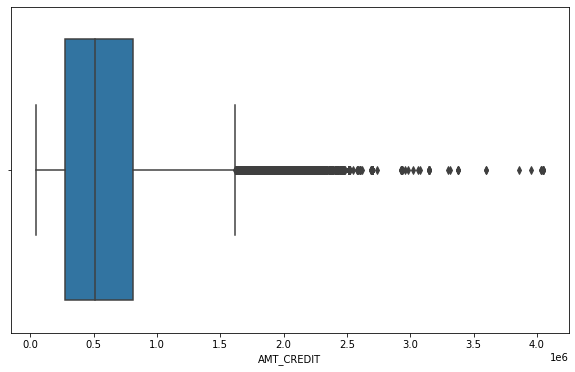

In [44]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(df1.AMT_CREDIT)

In [45]:
#Remove outliers for Amt credit

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper
lower_1, upper_1 = remove_outlier(df1.AMT_CREDIT)
df1 = df1.loc[(df1.AMT_CREDIT > lower_1) & (df1.AMT_CREDIT < upper_1)] 

<AxesSubplot:xlabel='AMT_CREDIT'>

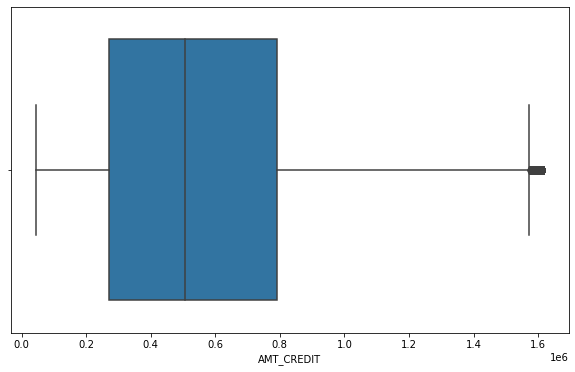

In [46]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(df1.AMT_CREDIT)

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

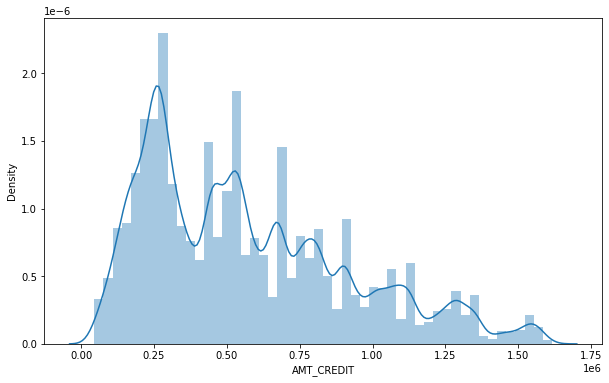

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(df1.AMT_CREDIT)

In [48]:
#check number of columns which have null values
print("No. of columns containing null values")
print(len(df1.columns[df1.isna().any()]))

No. of columns containing null values
0


# These 4 columns has (-) values which has to make (+) values with absolute 

(DAYS_BIRTH	DAYS_EMPLOYED	DAYS_REGISTRATION	DAYS_ID_PUBLISH) 



In [49]:
df1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  300949.000000  300949.000000      300949.000000    300949.000000
mean   -16027.957072   64269.444879       -4991.732081     -2993.198137
std      4376.471827  141641.051352        3524.270942      1508.615269
min    -25201.000000  -17912.000000      -24672.000000     -7197.000000
25%    -19688.000000   -2744.000000       -7487.000000     -4297.000000
50%    -15733.000000   -1204.000000       -4508.000000     -3252.000000
75%    -12384.000000    -284.000000       -2017.000000     -1720.000000
max     -7489.000000  365243.000000           0.000000         0.000000

In [50]:
days_column = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

In [51]:
df1[days_column] = df1[days_column].abs()

In [52]:
df1[days_column] = df1[days_column]/365

In [53]:
df1[days_column].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  300949.000000  300949.000000      300949.000000    300949.000000
mean       43.912211     186.727124          13.675978         8.200543
std        11.990334     383.048470           9.655537         4.133193
min        20.517808       0.000000           0.000000         0.000000
25%        33.928767       2.547945           5.526027         4.712329
50%        43.104110       6.057534          12.350685         8.909589
75%        53.939726      15.668493          20.512329        11.772603
max        69.043836    1000.665753          67.594521        19.717808

In [54]:
df1.rename(columns={'DAYS_BIRTH':'Birth_day','DAYS_EMPLOYED':'Emp_date','DAYS_REGISTRATION':'Reg_year','DAYS_ID_PUBLISH':'Publish_id'},inplace=True)

In [55]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   
2     100004       0    Revolving loans           M            Y   
3     100006       0         Cash loans           F            N   
4     100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Birth_day  Emp_date  \
0  House / apartment                    0.018801  25.920548  1.745205   
1  House / apartment                    0.003541  45.931507  3.254795   
2  House / apartment                    0.010032  52.180822  0.616438   
3  House / apartment                    0.008019  52.068493  8.326027   
4  House / apartment                    0.028663  54.608219  8.323288   

    Reg_year  Publish_id OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0   9.994521    5.808219        Laborers                  WEDNESDAY   
1   3.249315    0.797260      Core staff                     MONDAY   
2  11.671233    6.934247        Laborers                     MONDAY   
3  26.939726    6.676712        Laborers                  WEDNESDAY   
4  11.810959    9.473973      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

In [56]:
df1.shape

(300949, 29)

#### Checking indefference values in colums if any:

In [57]:
df1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         271731
Revolving loans     29218
Name: NAME_CONTRACT_TYPE, dtype: int64

In [58]:
df1['CODE_GENDER'].value_counts()

F      198455
M      102490
XNA         4
Name: CODE_GENDER, dtype: int64

In [59]:
df1['FLAG_OWN_CAR'].value_counts()

N    199801
Y    101148
Name: FLAG_OWN_CAR, dtype: int64

In [60]:
df1['FLAG_OWN_REALTY'].value_counts()

Y    209295
N     91654
Name: FLAG_OWN_REALTY, dtype: int64

In [61]:
df1['NAME_INCOME_TYPE'].value_counts()

Working                 156356
Commercial associate     69095
Pensioner                54546
State servant            20901
Unemployed                  21
Student                     18
Businessman                  7
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [62]:
df1['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    215360
Higher education                  71558
Incomplete higher                 10077
Lower secondary                    3799
Academic degree                     155
Name: NAME_EDUCATION_TYPE, dtype: int64

In [63]:
df1['NAME_HOUSING_TYPE'].value_counts()

House / apartment      266835
With parents            14673
Municipal apartment     10981
Rented apartment         4815
Office apartment         2543
Co-op apartment          1102
Name: NAME_HOUSING_TYPE, dtype: int64

In [64]:
df1['OCCUPATION_TYPE'].value_counts()

Others                   94599
Laborers                 54399
Sales staff              31689
Core staff               26786
Managers                 20148
Drivers                  18277
High skill tech staff    11057
Accountants               9393
Medicine staff            8366
Security staff            6640
Cooking staff             5902
Cleaning staff            4630
Private service staff     2584
Low-skill Laborers        2086
Waiters/barmen staff      1341
Secretaries               1283
Realty agents              730
HR staff                   537
IT staff                   502
Name: OCCUPATION_TYPE, dtype: int64

In [65]:
df1['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      52731
WEDNESDAY    50749
MONDAY       49664
THURSDAY     49518
FRIDAY       49274
SATURDAY     33189
SUNDAY       15824
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [66]:
df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    66213
XNA                       54557
Self-employed             37885
Other                     16295
Medicine                  10927
Business Entity Type 2    10326
Government                10176
School                     8684
Trade: type 7              7688
Kindergarten               6773
Construction               6563
Business Entity Type 1     5804
Transport: type 4          5276
Trade: type 3              3430
Industry: type 9           3250
Industry: type 3           3240
Security                   3191
Housing                    2893
Industry: type 11          2663
Military                   2515
Agriculture                2429
Bank                       2406
Police                     2216
Transport: type 2          2158
Postal                     2136
Security Ministries        1882
Trade: type 2              1835
Restaurant                 1788
Services                   1540
Industry: type 7           1281
University                 1265
Transpor

#### Working on XNA values for columns

In [67]:
df1['CODE_GENDER'].value_counts()

F      198455
M      102490
XNA         4
Name: CODE_GENDER, dtype: int64

In [68]:
df1.loc[df1['CODE_GENDER'] =='XNA', 'CODE_GENDER'] = 'F'
df1['CODE_GENDER'].value_counts()

F    198459
M    102490
Name: CODE_GENDER, dtype: int64

In [69]:
df1['ORGANIZATION_TYPE'].value_counts()   

Business Entity Type 3    66213
XNA                       54557
Self-employed             37885
Other                     16295
Medicine                  10927
Business Entity Type 2    10326
Government                10176
School                     8684
Trade: type 7              7688
Kindergarten               6773
Construction               6563
Business Entity Type 1     5804
Transport: type 4          5276
Trade: type 3              3430
Industry: type 9           3250
Industry: type 3           3240
Security                   3191
Housing                    2893
Industry: type 11          2663
Military                   2515
Agriculture                2429
Bank                       2406
Police                     2216
Transport: type 2          2158
Postal                     2136
Security Ministries        1882
Trade: type 2              1835
Restaurant                 1788
Services                   1540
Industry: type 7           1281
University                 1265
Transpor

In [70]:
df1 =df1.drop(df1.loc[df1['ORGANIZATION_TYPE'] =='XNA']. index)

In [71]:
df1[df1['ORGANIZATION_TYPE']=='XNA'].shape

(0, 29)

#### Converting all the variable into numericcal variables:

In [72]:
numeric_values = ['int16', 'int32','int64','float16','float32','float64']

numeric_df = df1.select_dtypes(include = numeric_values)
len(numeric_df.columns)

17

In [73]:
numeric_columns2 = ['TARGET','CNT_CHILDREN' , 'AMT_INCOME_TOTAL' , 'AMT_CREDIT' , 'AMT_ANNUITY' , 'REGION_POPULATION_RELATIVE','Birth_day',
                   'Emp_date','Reg_year','Publish_id','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                   'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
                   
df1[numeric_columns2] =df1[numeric_columns2].apply(pd.to_numeric)

In [74]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   
2     100004       0    Revolving loans           M            Y   
3     100006       0         Cash loans           F            N   
4     100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Birth_day  Emp_date  \
0  House / apartment                    0.018801  25.920548  1.745205   
1  House / apartment                    0.003541  45.931507  3.254795   
2  House / apartment                    0.010032  52.180822  0.616438   
3  House / apartment                    0.008019  52.068493  8.326027   
4  House / apartment                    0.028663  54.608219  8.323288   

    Reg_year  Publish_id OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0   9.994521    5.808219        Laborers                  WEDNESDAY   
1   3.249315    0.797260      Core staff                     MONDAY   
2  11.671233    6.934247        Laborers                     MONDAY   
3  26.939726    6.676712        Laborers                  WEDNESDAY   
4  11.810959    9.473973      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

In [75]:
#creating bins for AMT_INCOME_TOTAL and AMT_CREDIT

In [76]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [77]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df1['AMT_CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins=bins,labels=slots)

In [78]:
df1[['AMT_INCOME_RANGE','AMT_CREDIT_RANGE']].describe()

AMT_INCOME_RANGE  AMT_CREDIT_RANGE
count            246392            246392
unique               20                17
top       125000-150000  900000 and above
freq              39542             44972

In [79]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   
2     100004       0    Revolving loans           M            Y   
3     100006       0         Cash loans           F            N   
4     100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Birth_day  Emp_date  \
0  House / apartment                    0.018801  25.920548  1.745205   
1  House / apartment                    0.003541  45.931507  3.254795   
2  House / apartment                    0.010032  52.180822  0.616438   
3  House / apartment                    0.008019  52.068493  8.326027   
4  House / apartment                    0.028663  54.608219  8.323288   

    Reg_year  Publish_id OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0   9.994521    5.808219        Laborers                  WEDNESDAY   
1   3.249315    0.797260      Core staff                     MONDAY   
2  11.671233    6.934247        Laborers                     MONDAY   
3  26.939726    6.676712        Laborers                  WEDNESDAY   
4  11.810959    9.473973      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE AMT_INCOME_RANGE  AMT_CREDIT_RANGE  
0  Business Entity Type 3    200000-225000     400000-450000  
1                  School    250000-275000  900000 and above  
2              Government      50000-75000          0-150000  
3  Business Entity Type 3    125000-150000     300000-350000  
4                Religion    100000-125000     500000-550000

In [80]:
#creating the dataset into two dataset of Target_new=1(client with payment difficulties) and Target_new=0(Customer without payment difficulties)
Target_new0=df1[df1['TARGET']==0]
Target_new0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1          100003       0         Cash loans           F            N   
2          100004       0    Revolving loans           M            Y   
3          100006       0         Cash loans           F            N   
4          100007       0         Cash loans           M            N   
5          100008       0         Cash loans           M            N   
...           ...     ...                ...         ...          ...   
307503     456247       0         Cash loans           F            N   
307504     456248       0         Cash loans           F            N   
307506     456251       0         Cash loans           M            N   
307508     456253       0         Cash loans           F            N   
307510     456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307503               Y             0          112500.0    345510.0   
307504               Y             0          153000.0    331920.0   
307506               N             0          157500.0    254700.0   
307508               Y             0          153000.0    677664.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           35698.5         State servant               Higher education   
2            6750.0               Working  Secondary / secondary special   
3           29686.5               Working  Secondary / secondary special   
4           21865.5               Working  Secondary / secondary special   
5           27517.5         State servant  Secondary / secondary special   
...             ...                   ...                            ...   
307503      17770.5  Commercial associate               Higher education   
307504      16096.5               Working  Secondary / secondary special   
307506      27558.0               Working  Secondary / secondary special   
307508      29979.0               Working               Higher education   
307510      49117.5  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1                    Married  House / apartment                    0.003541   
2       Single / not married  House / apartment                    0.010032   
3             Civil marriage  House / apartment                    0.008019   
4       Single / not married  House / apartment                    0.028663   
5                    Married  House / apartment                    0.035792   
...                      ...                ...                         ...   
307503  Single / not married  House / apartment                    0.022800   
307504             Separated  House / apartment                    0.022625   
307506             Separated       With parents                    0.032561   
307508             Separated  House / apartment                    0.005002   
307510               Married  House / apartment                    0.046220   

        Birth_day   Emp_date   Reg_year  Publish_id OCCUPATION_TYPE  \
1       45.931507   3.254795   3.249315    0.797260      Core staff   
2       52.180822   0.616438  11.671233    6.934247        Laborers   
3       52.068493   8.326027  26.939726    6.676712        Laborers   
4       54.608219   8.323288  11.810959    9.473973      Core staff   
5       46.413699   4.350685  13.616438    1.306849        Laborers   
.

In [81]:
#creating the dataset into two dataset of Target_new=1(client with payment difficulties) and Target_new=0(Customer without payment difficulties)
Target_new1=df1[df1['TARGET']==1]
Target_new1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0          100002       1         Cash loans           M            N   
26         100031       1         Cash loans           F            N   
40         100047       1         Cash loans           M            N   
42         100049       1         Cash loans           F            N   
94         100112       1         Cash loans           M            Y   
...           ...     ...                ...         ...          ...   
307448     456186       1         Cash loans           M            N   
307475     456215       1         Cash loans           F            N   
307481     456225       1         Cash loans           M            N   
307489     456233       1         Cash loans           F            N   
307509     456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
26                   Y             0          112500.0    979992.0   
40                   Y             0          202500.0   1193580.0   
42                   N             0          135000.0    288873.0   
94                   Y             0          315000.0    953460.0   
...                ...           ...               ...         ...   
307448               N             1          207000.0    450000.0   
307475               N             1          144000.0   1303200.0   
307481               Y             0          225000.0    297000.0   
307489               Y             0          225000.0    521280.0   
307509               Y             0          171000.0    370107.0   

        AMT_ANNUITY      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           24700.5               Working  Secondary / secondary special   
26          27076.5               Working  Secondary / secondary special   
40          35028.0  Commercial associate  Secondary / secondary special   
42          16258.5               Working  Secondary / secondary special   
94          50000.0  Commercial associate              Incomplete higher   
...             ...                   ...                            ...   
307448      32746.5               Working  Secondary / secondary special   
307475      46809.0               Working               Higher education   
307481      19975.5               Working  Secondary / secondary special   
307489      23089.5  Commercial associate  Secondary / secondary special   
307509      20205.0  Commercial associate  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                    0.018801   
26                     Widow  House / apartment                    0.018029   
40                   Married  House / apartment                    0.025164   
42            Civil marriage  House / apartment                    0.007305   
94      Single / not married       With parents                    0.030755   
...                      ...                ...                         ...   
307448               Married  House / apartment                    0.020246   
307475        Civil marriage  House / apartment                    0.007330   
307481               Married  House / apartment                    0.008575   
307489        Civil marriage  House / apartment                    0.014464   
307509               Married  House / apartment                    0.005313   

        Birth_day   Emp_date   Reg_year  Publish_id OCCUPATION_TYPE  \
0       25.920548   1.745205   9.994521    5.808219        Laborers   
26      51.298630   7.200000  18.008219    5.005479   Cooking staff   
40      47.895890   3.457534   3.238356    2.819178        Laborers   
42      36.668493   9.854795   0.123288   12.079452     Sales staff   
94      27.942466   5.520548  13.156164    2.843836          Others   
.

In [82]:
Target_ratio = Target_new0.shape[0]/Target_new1.shape[0]
Target_ratio

10.410734960403834

In [83]:
Target_new0.shape

(224799, 31)

In [84]:
Target_new1.shape

(21593, 31)

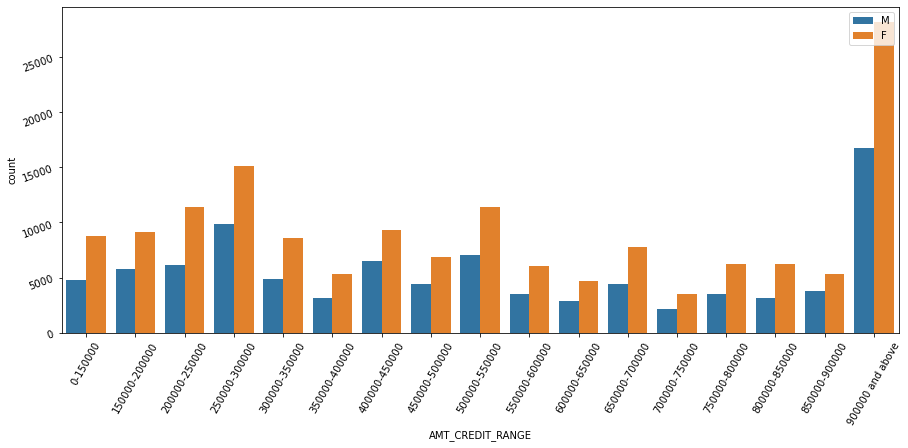

In [85]:
#amount credit with gender

plt.figure(figsize=[15,6])
sns.countplot(data=df1, x='AMT_CREDIT_RANGE',hue='CODE_GENDER')
plt.xticks(rotation=60)
plt.yticks(rotation=20)
plt.legend(loc='upper right')
plt.show()

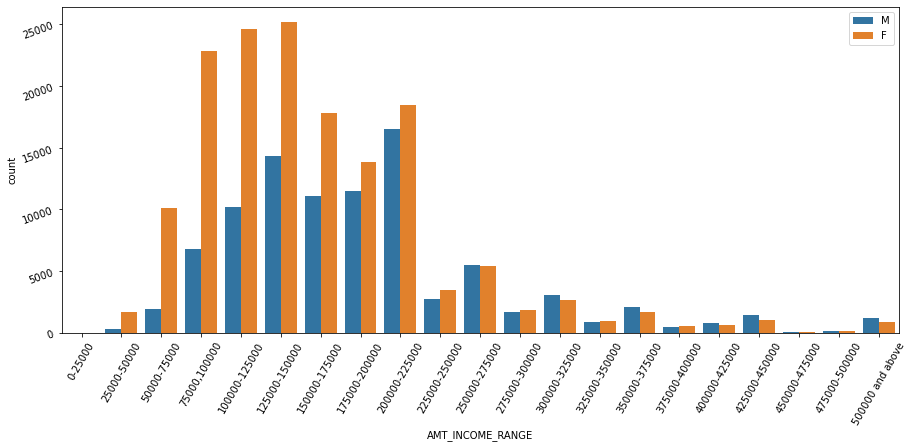

In [86]:
#amount income with gender

#amount credit with gender

plt.figure(figsize=[15,6])
sns.countplot(data=df1, x='AMT_INCOME_RANGE',hue='CODE_GENDER')
plt.xticks(rotation=60)
plt.yticks(rotation=20)
plt.legend(loc='upper right')
plt.show()

In [87]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   
2     100004       0    Revolving loans           M            Y   
3     100006       0         Cash loans           F            N   
4     100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Birth_day  Emp_date  \
0  House / apartment                    0.018801  25.920548  1.745205   
1  House / apartment                    0.003541  45.931507  3.254795   
2  House / apartment                    0.010032  52.180822  0.616438   
3  House / apartment                    0.008019  52.068493  8.326027   
4  House / apartment                    0.028663  54.608219  8.323288   

    Reg_year  Publish_id OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0   9.994521    5.808219        Laborers                  WEDNESDAY   
1   3.249315    0.797260      Core staff                     MONDAY   
2  11.671233    6.934247        Laborers                     MONDAY   
3  26.939726    6.676712        Laborers                  WEDNESDAY   
4  11.810959    9.473973      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE AMT_INCOME_RANGE  AMT_CREDIT_RANGE  
0  Business Entity Type 3    200000-225000     400000-450000  
1                  School    250000-275000  900000 and above  
2              Government      50000-75000          0-150000  
3  Business Entity Type 3    125000-150000     300000-350000  
4                Religion    100000-125000     500000-550000

# Outlier

checking outliers and removing the outliers

# ##CNT_CHILDREN

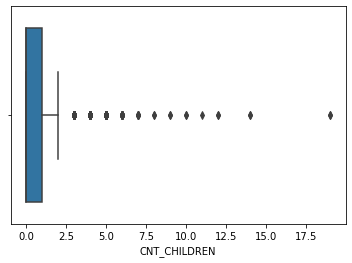

In [88]:
sns.boxplot(df1.CNT_CHILDREN)
plt.show()

In [89]:
df1[df1['CNT_CHILDREN']== df1['CNT_CHILDREN'].max()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
155369     280108       0         Cash loans           F            N   
265784     407877       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
155369               Y            19          112500.0    269550.0   
265784               Y            19          112500.0    135000.0   

        AMT_ANNUITY NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
155369      13891.5          Working  Secondary / secondary special   
265784       8788.5          Working               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
155369  Single / not married  House / apartment                    0.007020   
265784  Single / not married  House / apartment                    0.015221   

        Birth_day  Emp_date   Reg_year  Publish_id       OCCUPATION_TYPE  \
155369  30.293151  5.076712   8.482192    2.041096  Waiters/barmen staff   
265784  28.210959  2.454795  12.967123    7.120548            Core staff   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
155369                     SUNDAY                       11   
265784                   THURSDAY                       15   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
155369                           0                           0   
265784                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
155369                            0                       0   
265784                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
155369                       0                        0        Restaurant   
265784                       0                        0      Kindergarten   

       AMT_INCOME_RANGE AMT_CREDIT_RANGE  
155369    100000-125000    250000-300000  
265784    100000-125000         0-150000

In [90]:
#Remove outliers for Children cnt
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper
lower_1, upper_1 = remove_outlier(df1.CNT_CHILDREN)
df1 = df1.loc[(df1.CNT_CHILDREN > lower_1) & (df1.CNT_CHILDREN < upper_1)] 

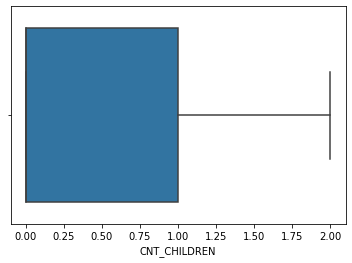

In [91]:
sns.boxplot(df1.CNT_CHILDREN)
plt.show()

REGION_POPULATION_RELATIVE

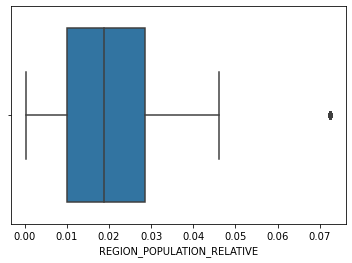

In [92]:
sns.boxplot(df1.REGION_POPULATION_RELATIVE)
plt.show()

In [93]:
#Remove outliers for REGION_POPULATION_RELATIVE

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper
lower_1, upper_1 = remove_outlier(df1.REGION_POPULATION_RELATIVE)
df1 = df1.loc[(df1.REGION_POPULATION_RELATIVE > lower_1) & (df1.REGION_POPULATION_RELATIVE < upper_1)] 

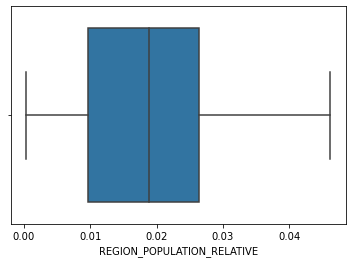

In [94]:
sns.boxplot(df1.REGION_POPULATION_RELATIVE)
plt.show()

### Some outliers represent natural variations in the dataset. these are true outliers so i am remvoing it 

In [95]:
df1.Emp_date.describe()

count    236232.000000
mean          6.517767
std           6.419720
min           0.000000
25%           2.090411
50%           4.490411
75%           8.663014
max          49.073973
Name: Emp_date, dtype: float64

In [96]:
df1.Reg_year.describe()

count    236232.000000
mean         12.695047
std           8.899695
min           0.000000
25%           5.060274
50%          11.673973
75%          19.041096
max          62.816438
Name: Reg_year, dtype: float64

In [97]:
df1.Publish_id.describe()

count    236232.000000
mean          7.647958
std           4.142864
min           0.000000
25%           4.052055
50%           7.871233
75%          11.419178
max          19.717808
Name: Publish_id, dtype: float64

In [98]:
df1.Birth_day.describe()

count    236232.000000
mean         40.429057
std          10.085421
min          20.517808
25%          32.106849
50%          39.942466
75%          48.158904
max          69.041096
Name: Birth_day, dtype: float64

# Visualization

<AxesSubplot:>

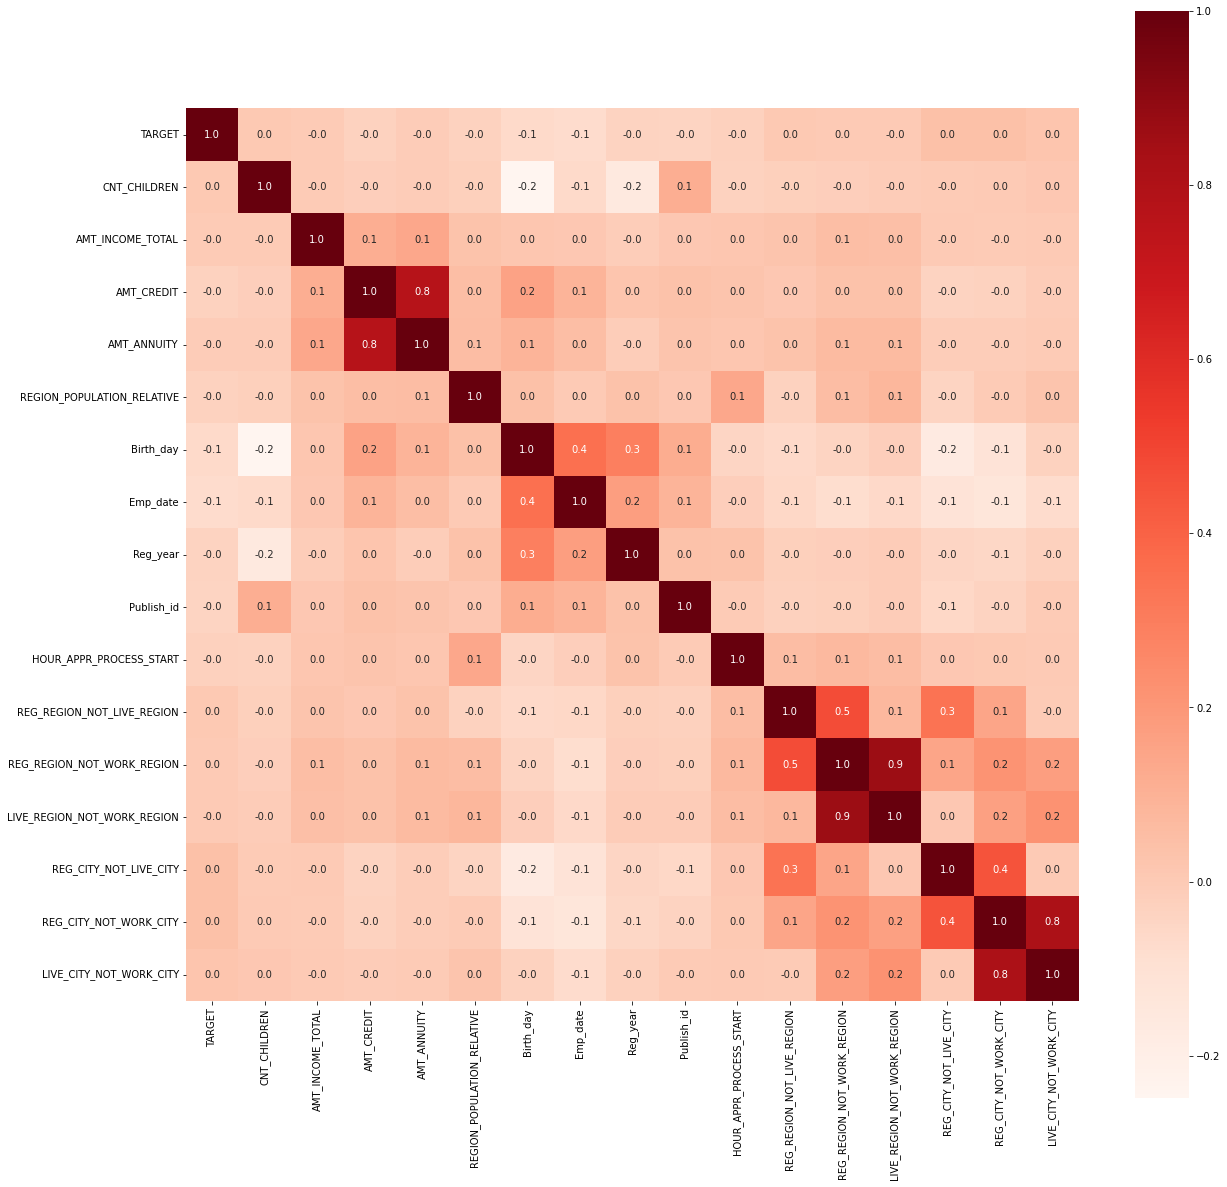

In [99]:
#Checking correlation between the variables.
corr = df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

<AxesSubplot:>

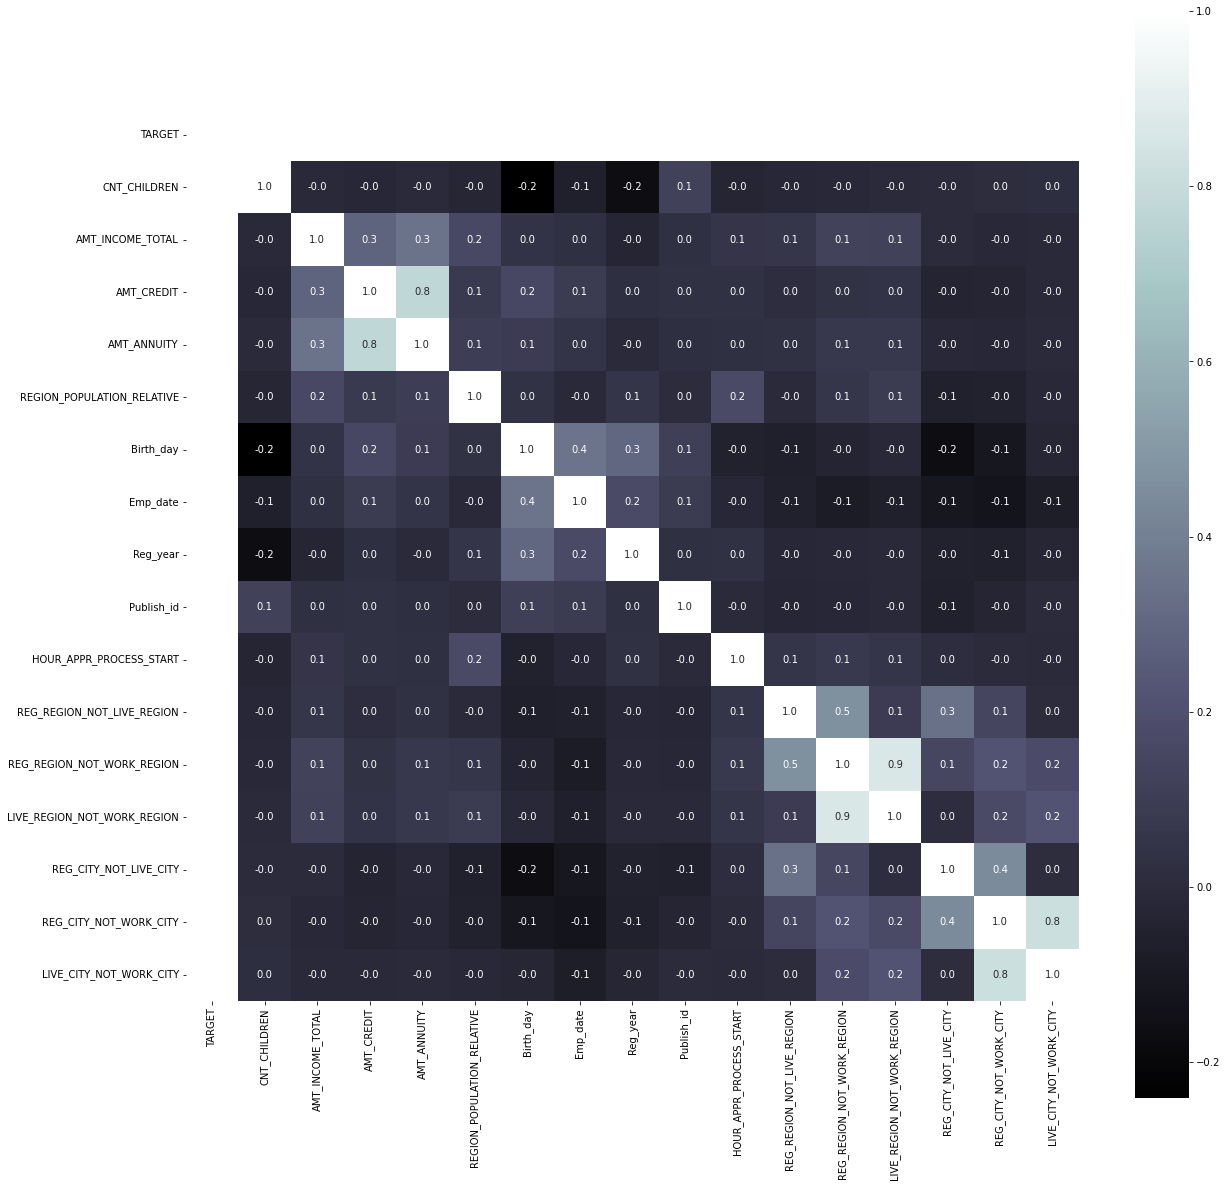

In [100]:
#Checking correlation between the Target0
corr = Target_new0.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='bone')

<AxesSubplot:>

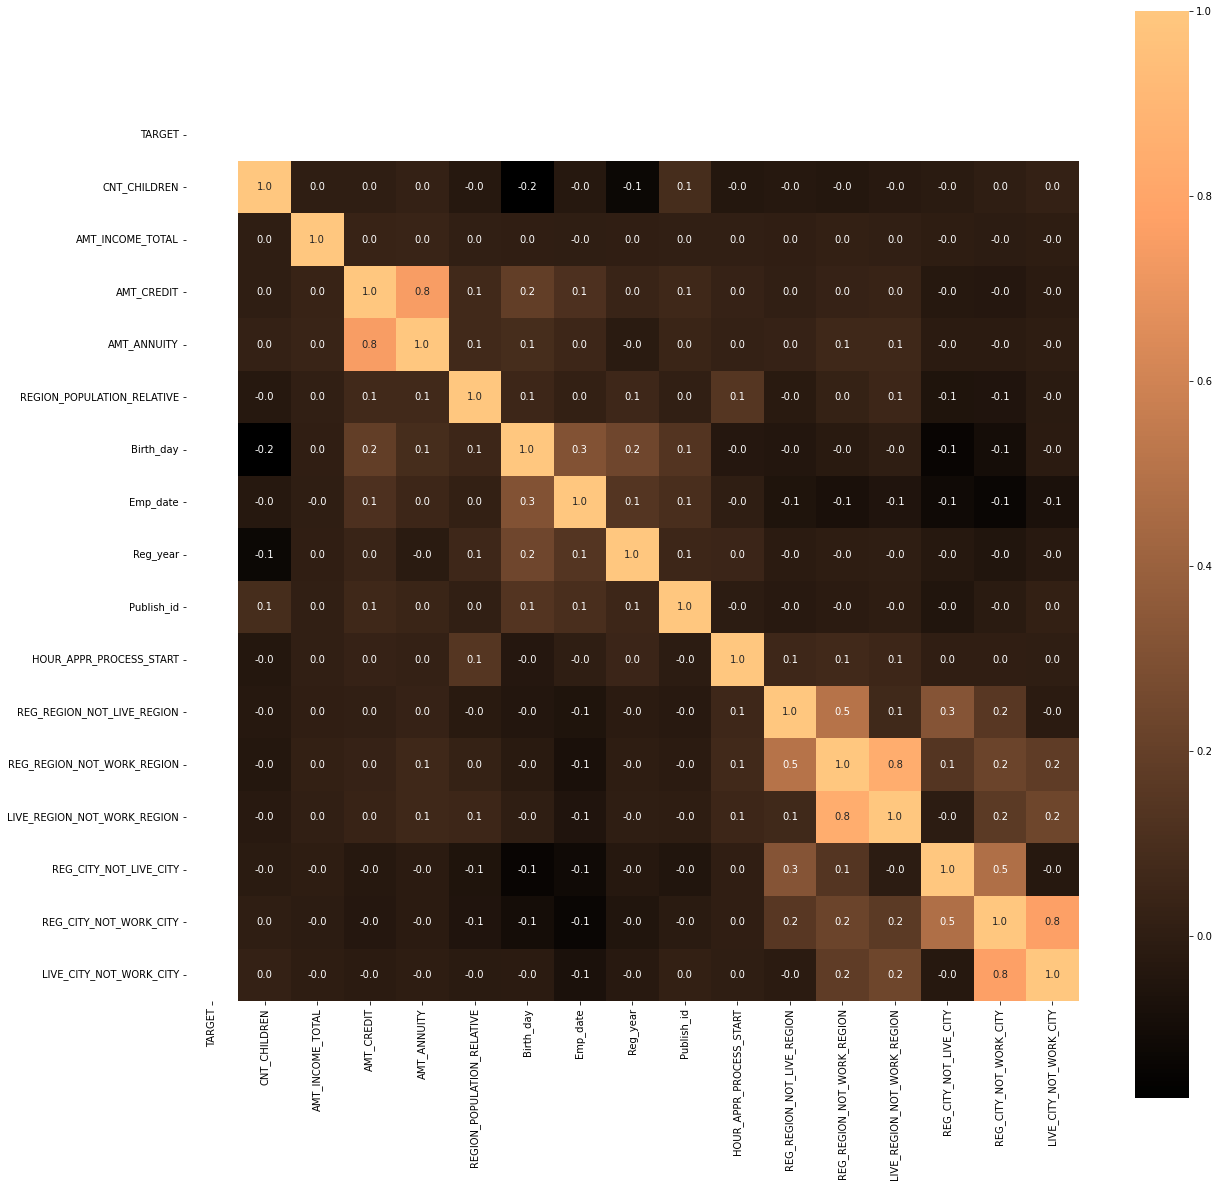

In [101]:
#Checking correlation between the Target1
corr = Target_new1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='copper')

In [102]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   
2     100004       0    Revolving loans           M            Y   
3     100006       0         Cash loans           F            N   
4     100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Birth_day  Emp_date  \
0  House / apartment                    0.018801  25.920548  1.745205   
1  House / apartment                    0.003541  45.931507  3.254795   
2  House / apartment                    0.010032  52.180822  0.616438   
3  House / apartment                    0.008019  52.068493  8.326027   
4  House / apartment                    0.028663  54.608219  8.323288   

    Reg_year  Publish_id OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0   9.994521    5.808219        Laborers                  WEDNESDAY   
1   3.249315    0.797260      Core staff                     MONDAY   
2  11.671233    6.934247        Laborers                     MONDAY   
3  26.939726    6.676712        Laborers                  WEDNESDAY   
4  11.810959    9.473973      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE AMT_INCOME_RANGE  AMT_CREDIT_RANGE  
0  Business Entity Type 3    200000-225000     400000-450000  
1                  School    250000-275000  900000 and above  
2              Government      50000-75000          0-150000  
3  Business Entity Type 3    125000-150000     300000-350000  
4                Religion    100000-125000     500000-550000

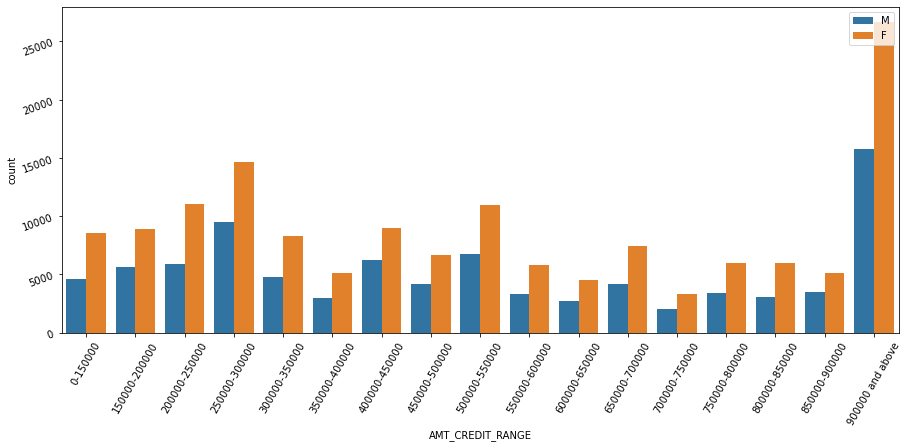

In [103]:
#checking Amt _credit with gender

plt.figure(figsize=[15,6])
sns.countplot(data=df1, x='AMT_CREDIT_RANGE',hue='CODE_GENDER')
plt.xticks(rotation=60)
plt.yticks(rotation=20)
plt.legend(loc='upper right')
plt.show()

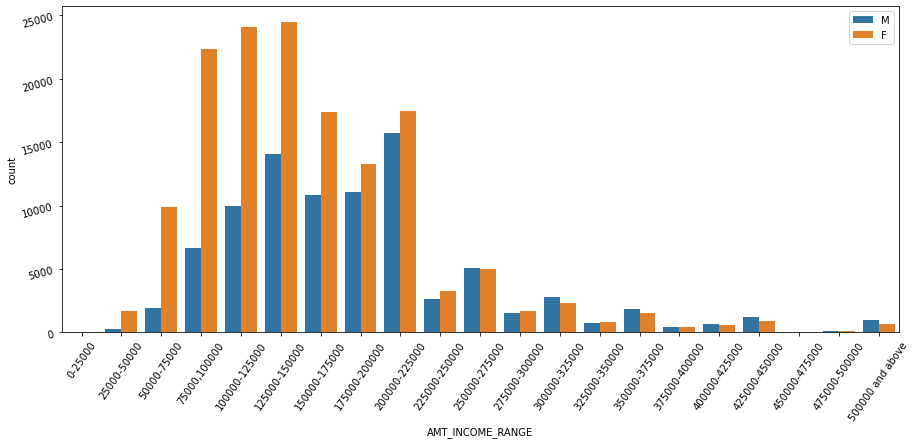

In [104]:
#checking Amt_income with gender

plt.figure(figsize=[15,6])
sns.countplot(data=df1, x='AMT_INCOME_RANGE',hue='CODE_GENDER')
plt.xticks(rotation=55)
plt.yticks(rotation =15)
plt.legend(loc='upper right')
plt.show()

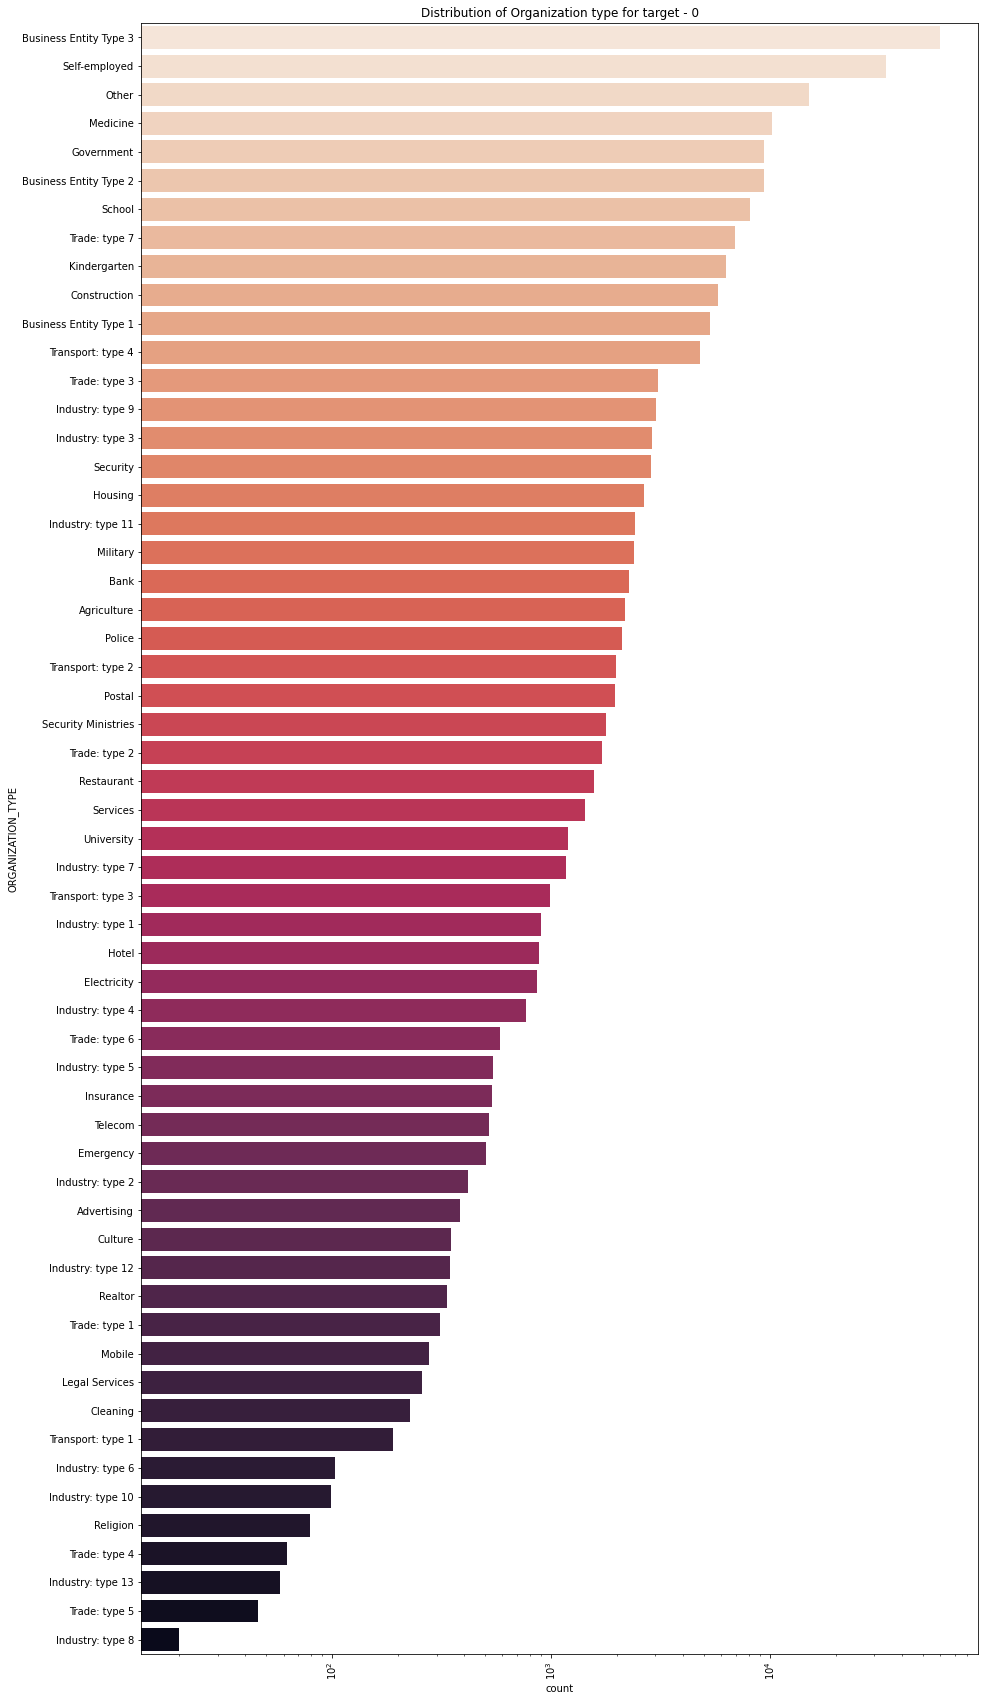

In [105]:

# Plotting for Organization type of Target_new0 in logarithmic scale

plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for target - 0")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=Target_new0,y='ORGANIZATION_TYPE',order=Target_new0['ORGANIZATION_TYPE'].value_counts().index,palette ='rocket_r')
plt.show()

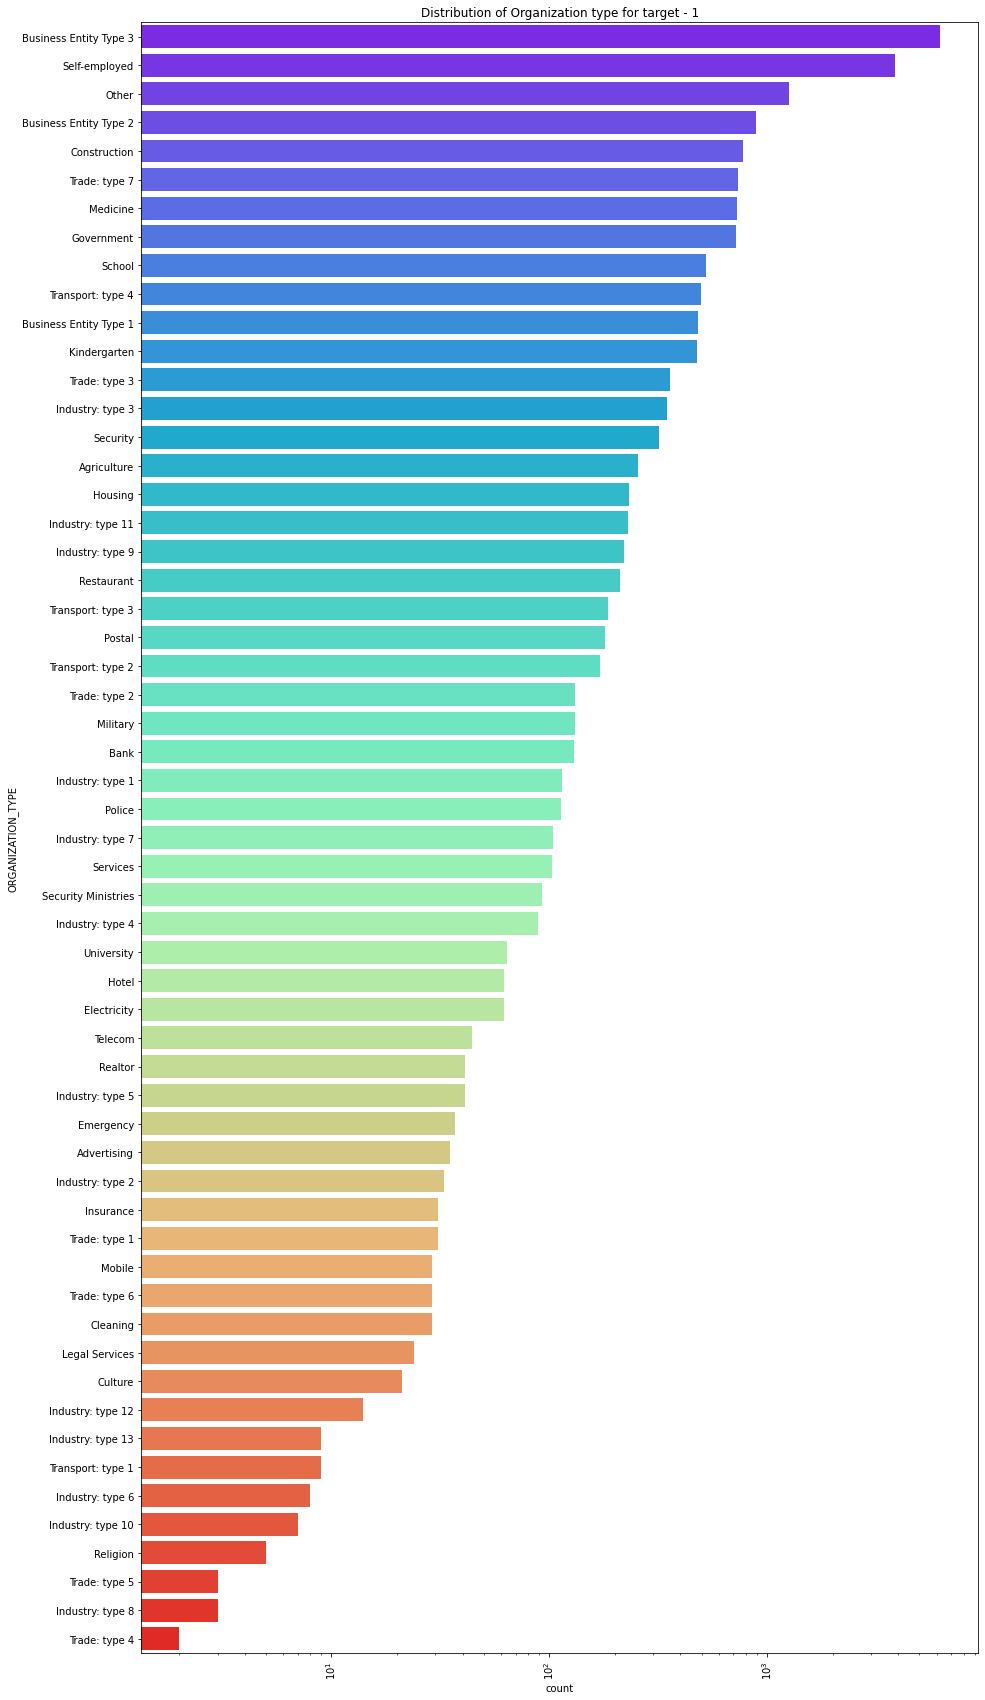

In [106]:

# Plotting for Organization type of Target_new1 in logarithmic scale

plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for target - 1")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=Target_new1,y='ORGANIZATION_TYPE',order=Target_new1['ORGANIZATION_TYPE'].value_counts().index,palette ='rainbow')
plt.show()

In [107]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   
2     100004       0    Revolving loans           M            Y   
3     100006       0         Cash loans           F            N   
4     100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Birth_day  Emp_date  \
0  House / apartment                    0.018801  25.920548  1.745205   
1  House / apartment                    0.003541  45.931507  3.254795   
2  House / apartment                    0.010032  52.180822  0.616438   
3  House / apartment                    0.008019  52.068493  8.326027   
4  House / apartment                    0.028663  54.608219  8.323288   

    Reg_year  Publish_id OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0   9.994521    5.808219        Laborers                  WEDNESDAY   
1   3.249315    0.797260      Core staff                     MONDAY   
2  11.671233    6.934247        Laborers                     MONDAY   
3  26.939726    6.676712        Laborers                  WEDNESDAY   
4  11.810959    9.473973      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE AMT_INCOME_RANGE  AMT_CREDIT_RANGE  
0  Business Entity Type 3    200000-225000     400000-450000  
1                  School    250000-275000  900000 and above  
2              Government      50000-75000          0-150000  
3  Business Entity Type 3    125000-150000     300000-350000  
4                Religion    100000-125000     500000-550000

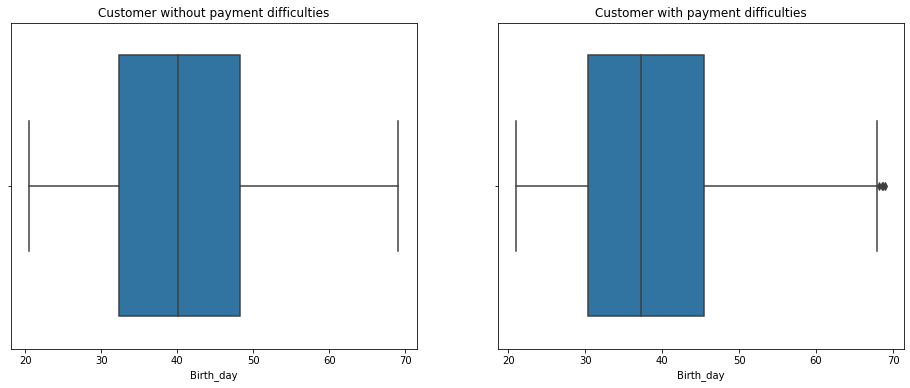

In [108]:
#univariate analysis for 'Years_Birth'

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(Target_new0['Birth_day'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(Target_new1['Birth_day'])
plt.title('Customer with payment difficulties')
plt.show()

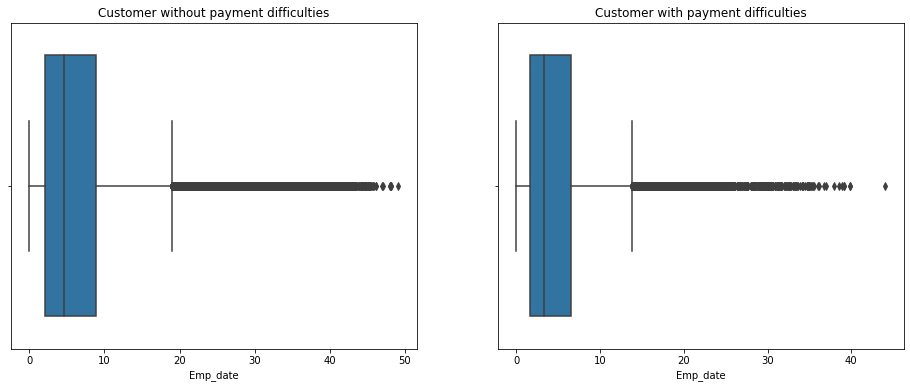

In [109]:
#Univariate analysis on variable ''Years_Employed''
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Customer without payment difficulties')
sns.boxplot(Target_new0[Target_new0['Emp_date']<1000]['Emp_date'])
plt.subplot(1,2,2)
plt.title('Customer with payment difficulties')
sns.boxplot(Target_new1[Target_new1['Emp_date']<1000]['Emp_date'])
plt.show()

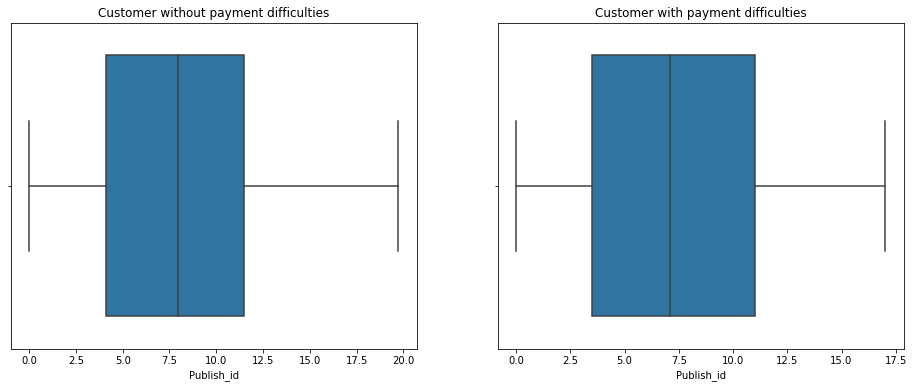

In [110]:
#Univariate analysis on variable ''change the identity document ''
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Customer without payment difficulties')
sns.boxplot(Target_new0[Target_new0['Publish_id']<1000]['Publish_id'])
plt.subplot(1,2,2)
plt.title('Customer with payment difficulties')
sns.boxplot(Target_new1[Target_new1['Publish_id']<1000]['Publish_id'])
plt.show()

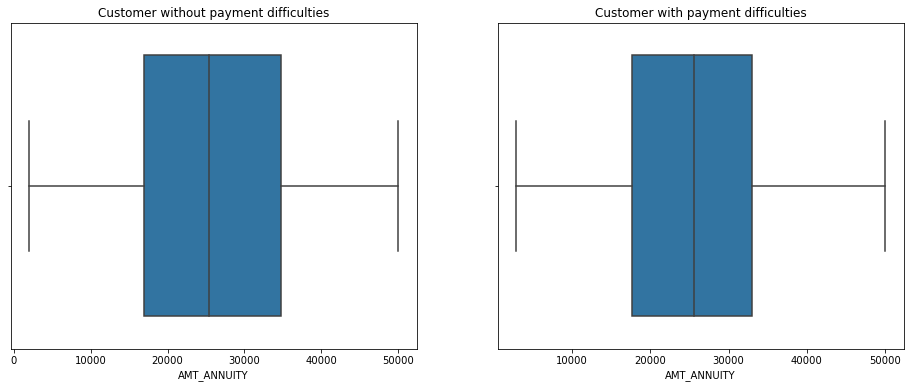

In [111]:
#Univariate analysis on variable ''cPayment difficulties ''
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(Target_new0['AMT_ANNUITY'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.boxplot(Target_new1['AMT_ANNUITY'])
plt.title('Customer with payment difficulties')
plt.show()

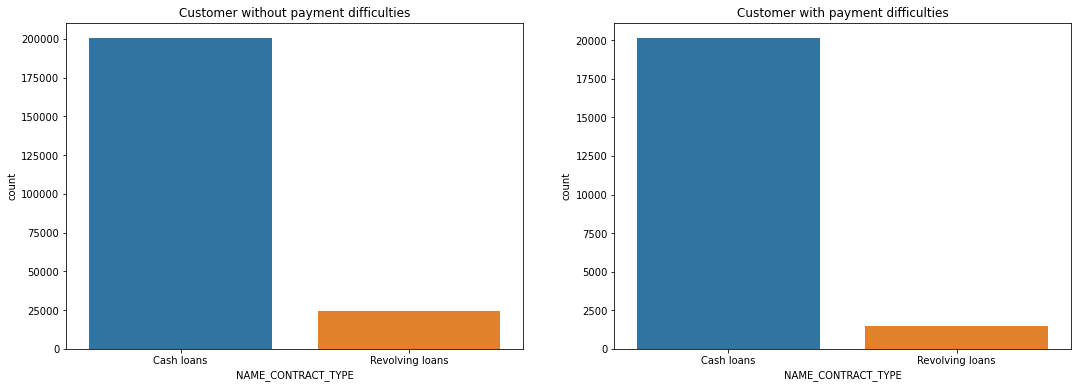

In [112]:
#Univariate Analysis on Loans type
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['NAME_CONTRACT_TYPE'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(Target_new1['NAME_CONTRACT_TYPE'])
plt.title('Customer with payment difficulties')
plt.show()

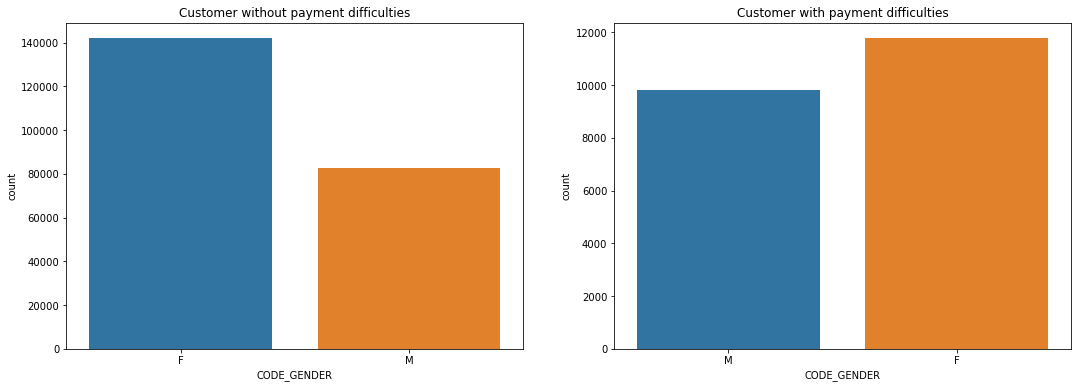

In [113]:
#Univariate Analysis on CODE_GENDER

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['CODE_GENDER'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(Target_new1['CODE_GENDER'])
plt.title('Customer with payment difficulties')
plt.show()

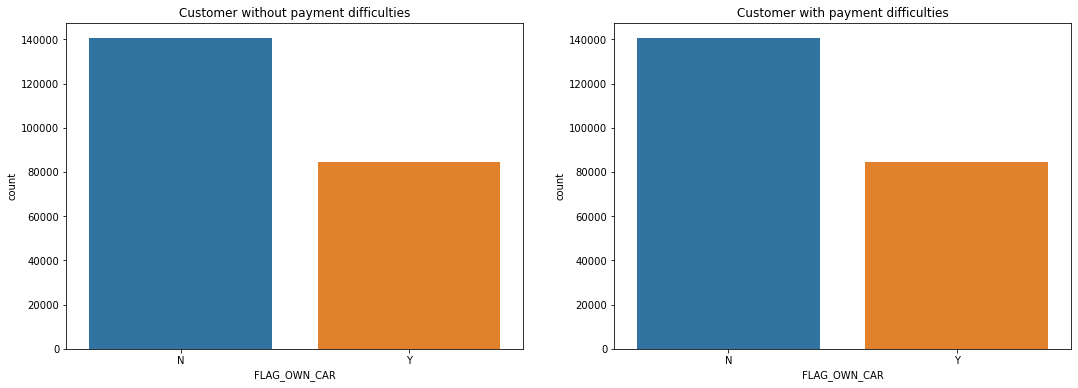

In [114]:
#Univariate Analysis on FLAG_OWN_CAR
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['FLAG_OWN_CAR'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(Target_new0['FLAG_OWN_CAR'])
plt.title('Customer with payment difficulties')
plt.show()

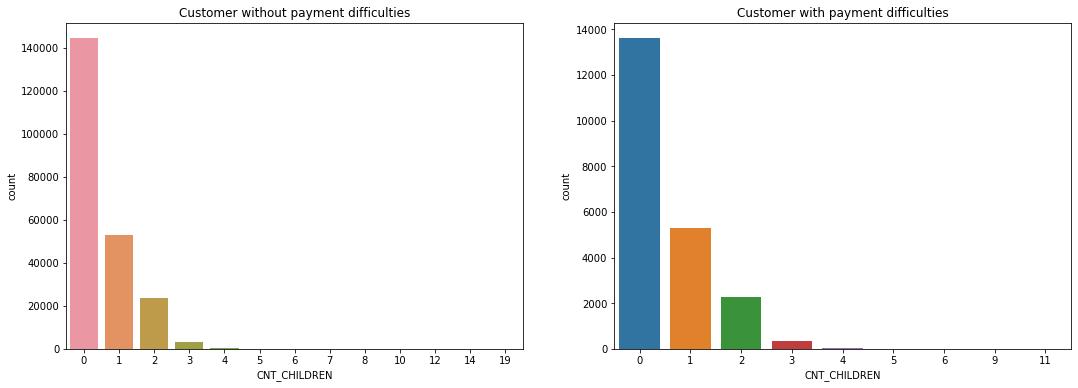

In [115]:
#Univariate Analysis on CNT_CHILDREN

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['CNT_CHILDREN'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(Target_new1['CNT_CHILDREN'])
plt.title('Customer with payment difficulties')
plt.show()

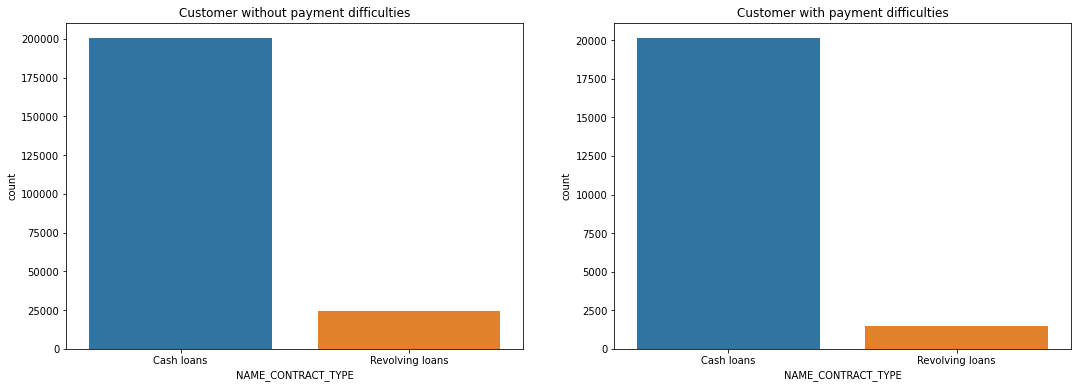

In [116]:
#Univariate Analysis on NAME_CONTRACT_TYPE

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['NAME_CONTRACT_TYPE'])
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(Target_new1['NAME_CONTRACT_TYPE'])
plt.title('Customer with payment difficulties')
plt.show()

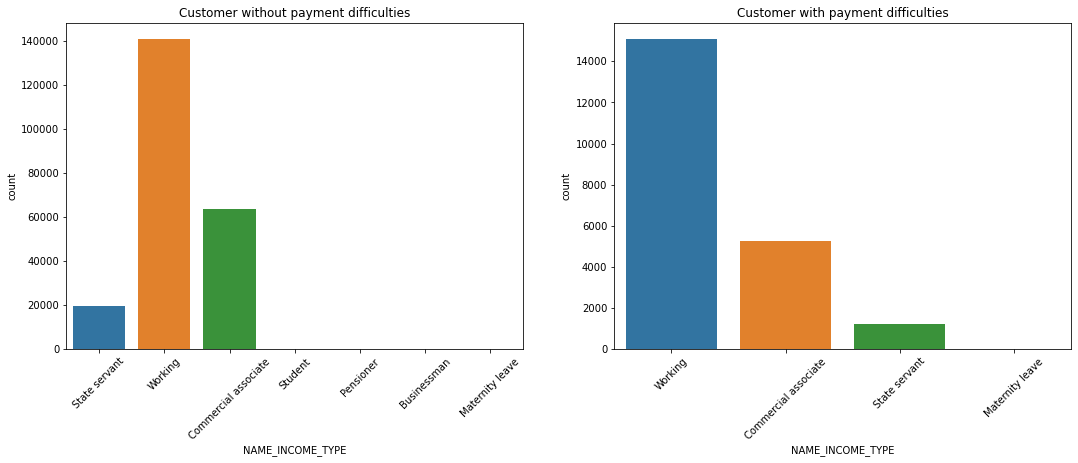

In [117]:
#Univariate Analysis on NAME_INCOME_TYPE

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['NAME_INCOME_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(Target_new1['NAME_INCOME_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=45)
plt.show()

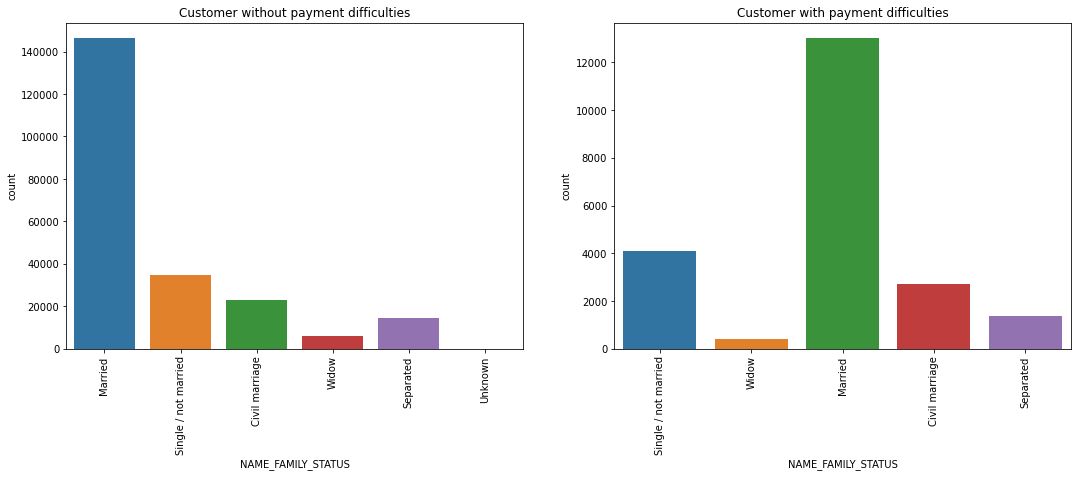

In [118]:
#Univariate Analysis on NAME_FAMILY_STATUS

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['NAME_FAMILY_STATUS'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(Target_new1['NAME_FAMILY_STATUS'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

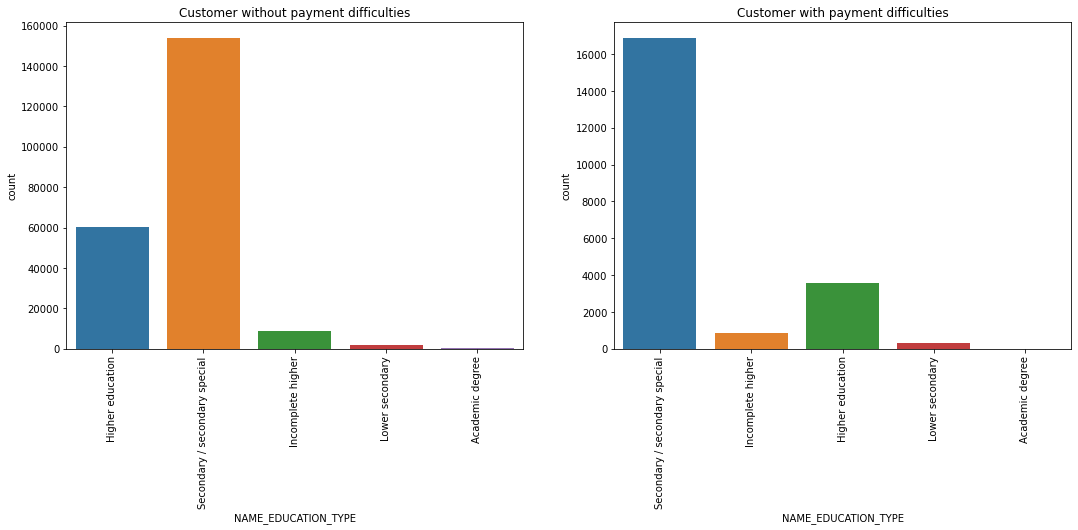

In [119]:
#Univariate Analysis on NAME_EDUCATION_TYPE
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['NAME_EDUCATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(Target_new1['NAME_EDUCATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

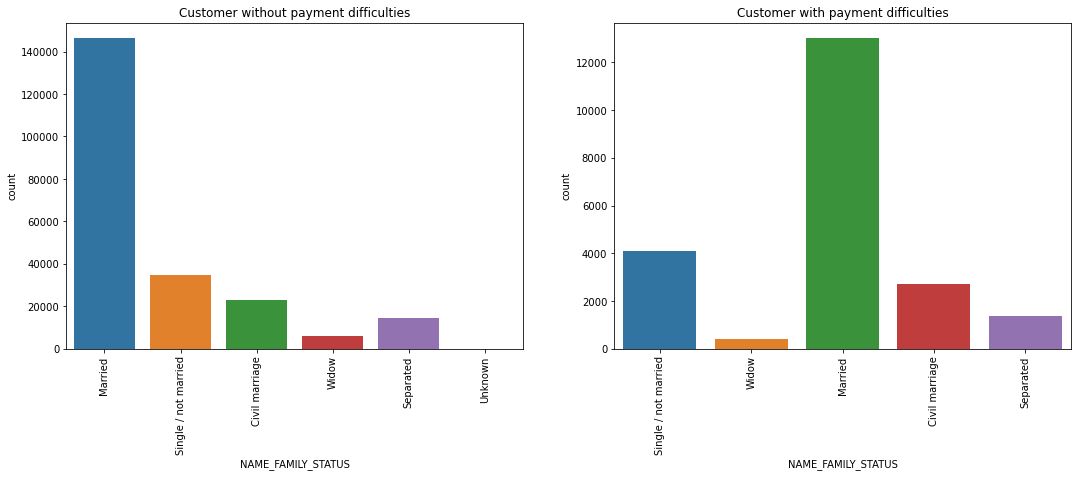

In [120]:
#Univariate Analysis on NAME_FAMILY_STATUS
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['NAME_FAMILY_STATUS'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(Target_new1['NAME_FAMILY_STATUS'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

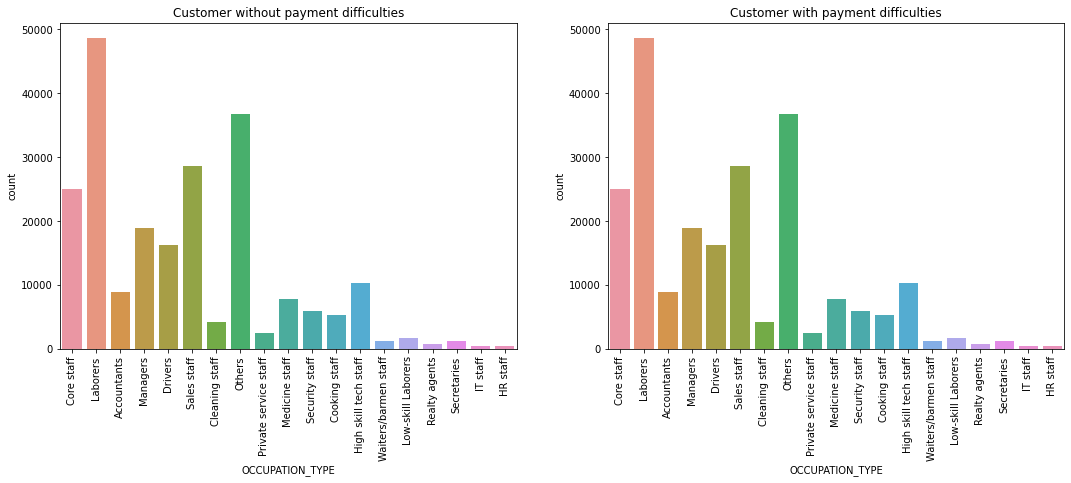

In [121]:
#Univariate Analysis on OCCUPATION_TYPE

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['OCCUPATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(Target_new0['OCCUPATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()



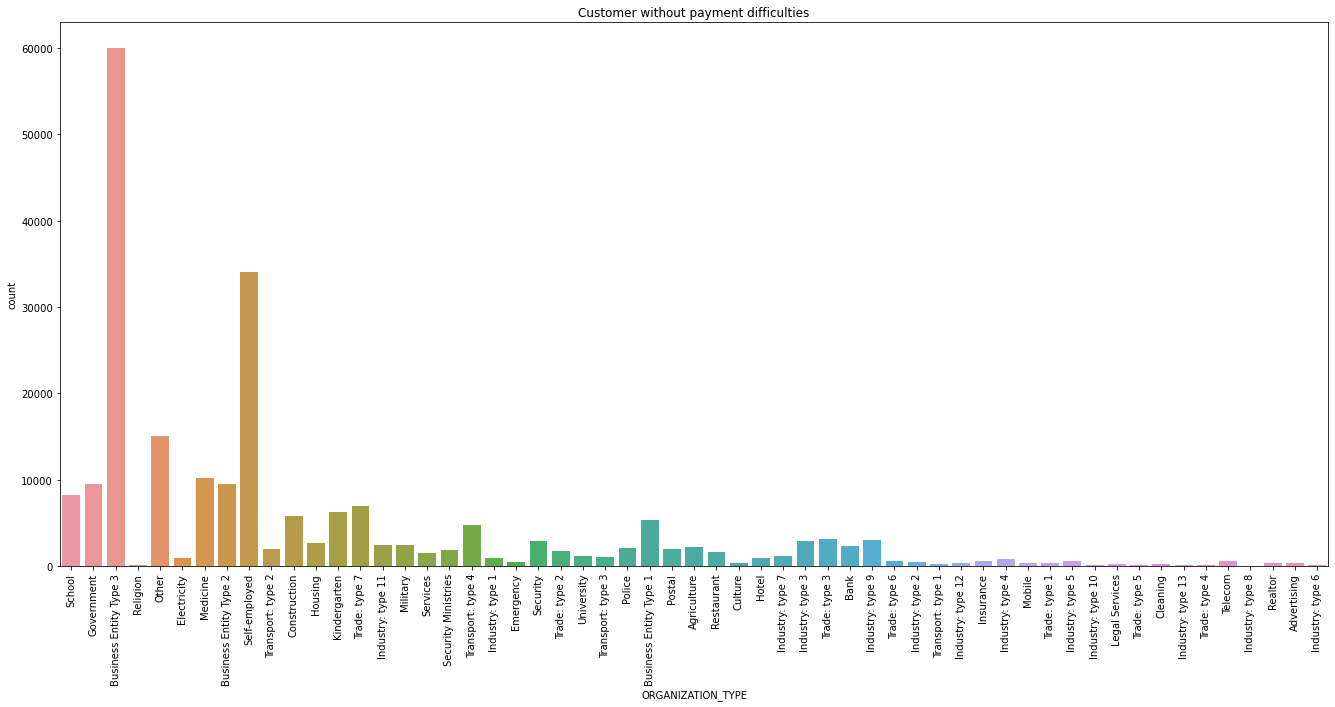

In [122]:
#Univariate Analysis on OCCUPATION_TYPE on target new 0.

plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
sns.countplot(Target_new0['ORGANIZATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.show()

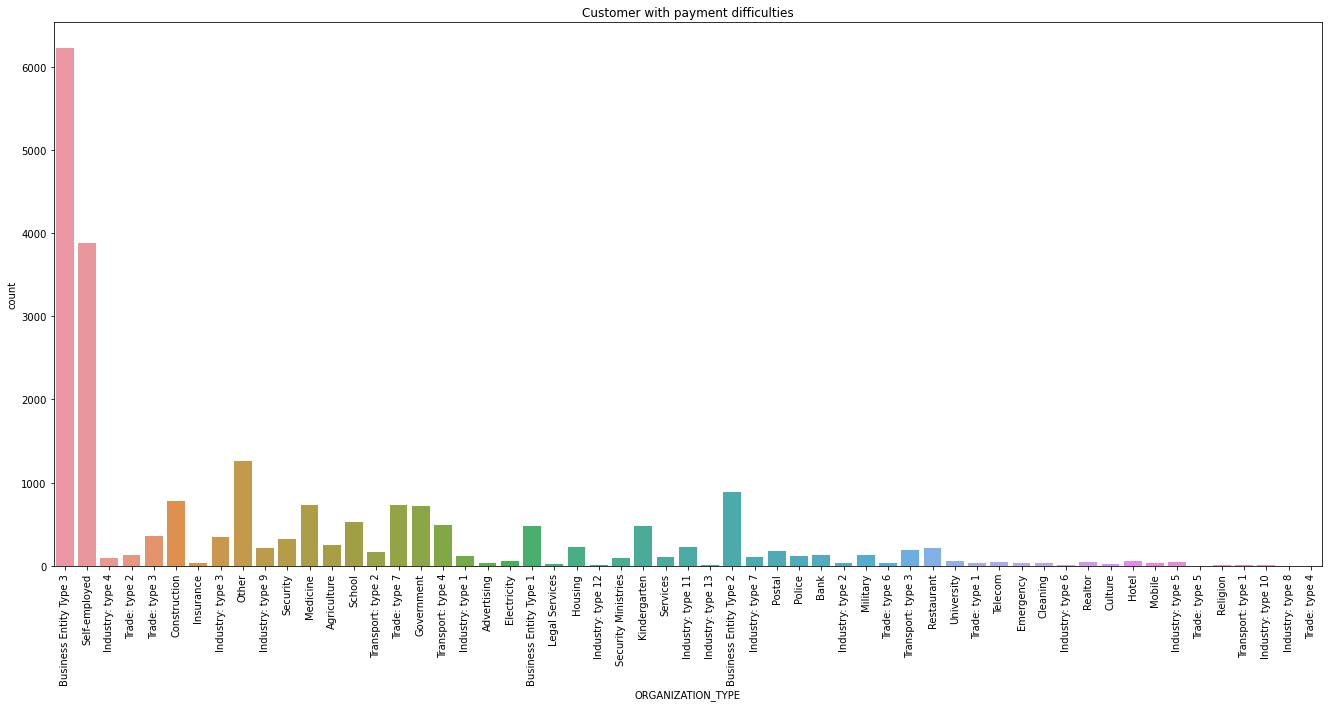

In [123]:
#Univariate Analysis on OCCUPATION_TYPE on target new 1.

plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
sns.countplot(Target_new1['ORGANIZATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

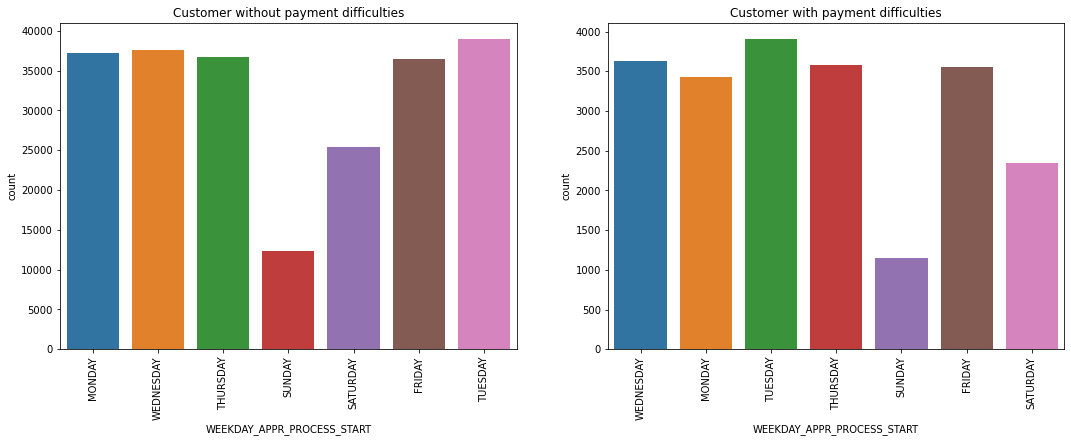

In [124]:
#Univariate Analysis on WEEKDAY_APPR_PROCESS_START.

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(Target_new0['WEEKDAY_APPR_PROCESS_START'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(Target_new1['WEEKDAY_APPR_PROCESS_START'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

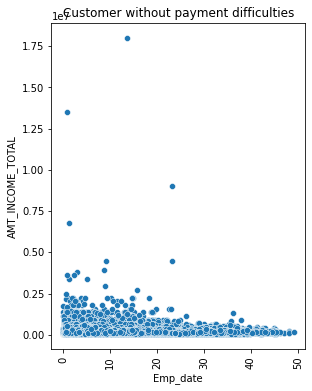

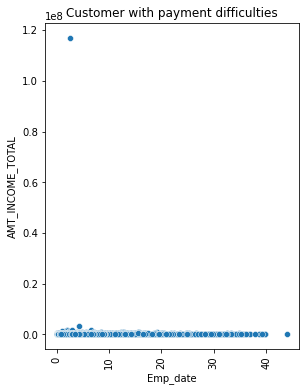

In [125]:
#bivariate analysis on 'Years_Employed','AMT_INCOME_TOTAL'

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data = Target_new0[Target_new0['Emp_date']<1000], x = 'Emp_date', y ='AMT_INCOME_TOTAL' )
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data = Target_new1[Target_new1['Emp_date']<1000], x = 'Emp_date', y ='AMT_INCOME_TOTAL' )
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

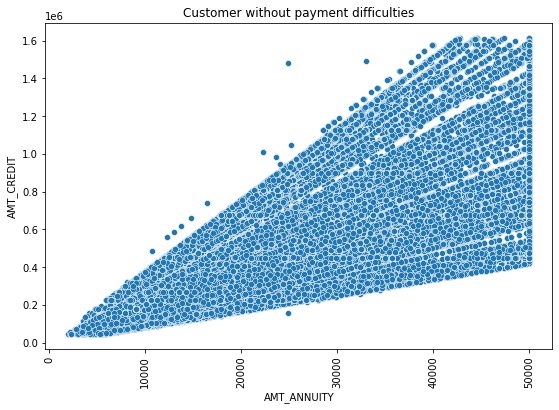

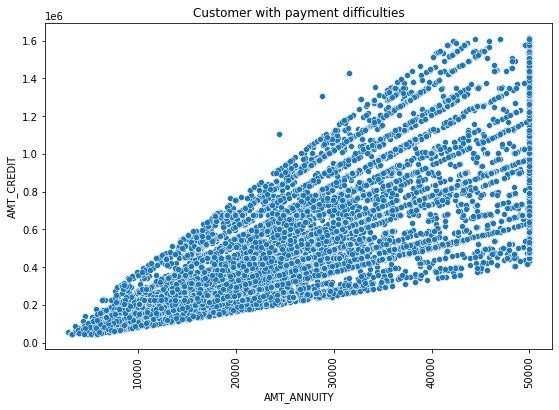

In [126]:
#bivariate analysis on AMT_CREDIT and AMT_GOODS_PRICE

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data = Target_new0, x = 'AMT_ANNUITY', y ='AMT_CREDIT' )
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.scatterplot(data = Target_new1, x = 'AMT_ANNUITY', y ='AMT_CREDIT' )
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

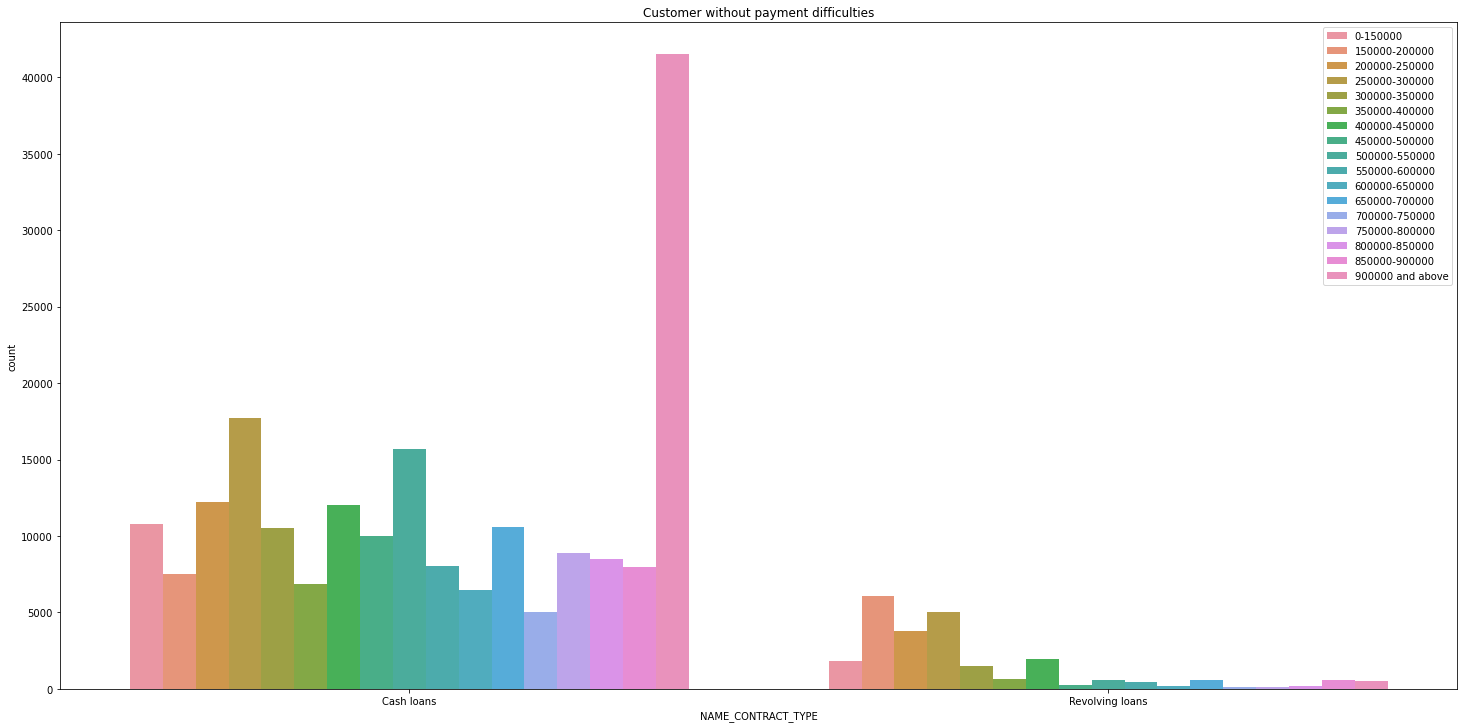

In [127]:
#bivariate analysis on NAME_CONTRACT_TYPE and Amt_Credit_Range for target_new 0

plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
sns.countplot(data=Target_new0,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.legend(loc='upper right')
plt.tight_layout()
plt.title('Customer without payment difficulties')
plt.show()

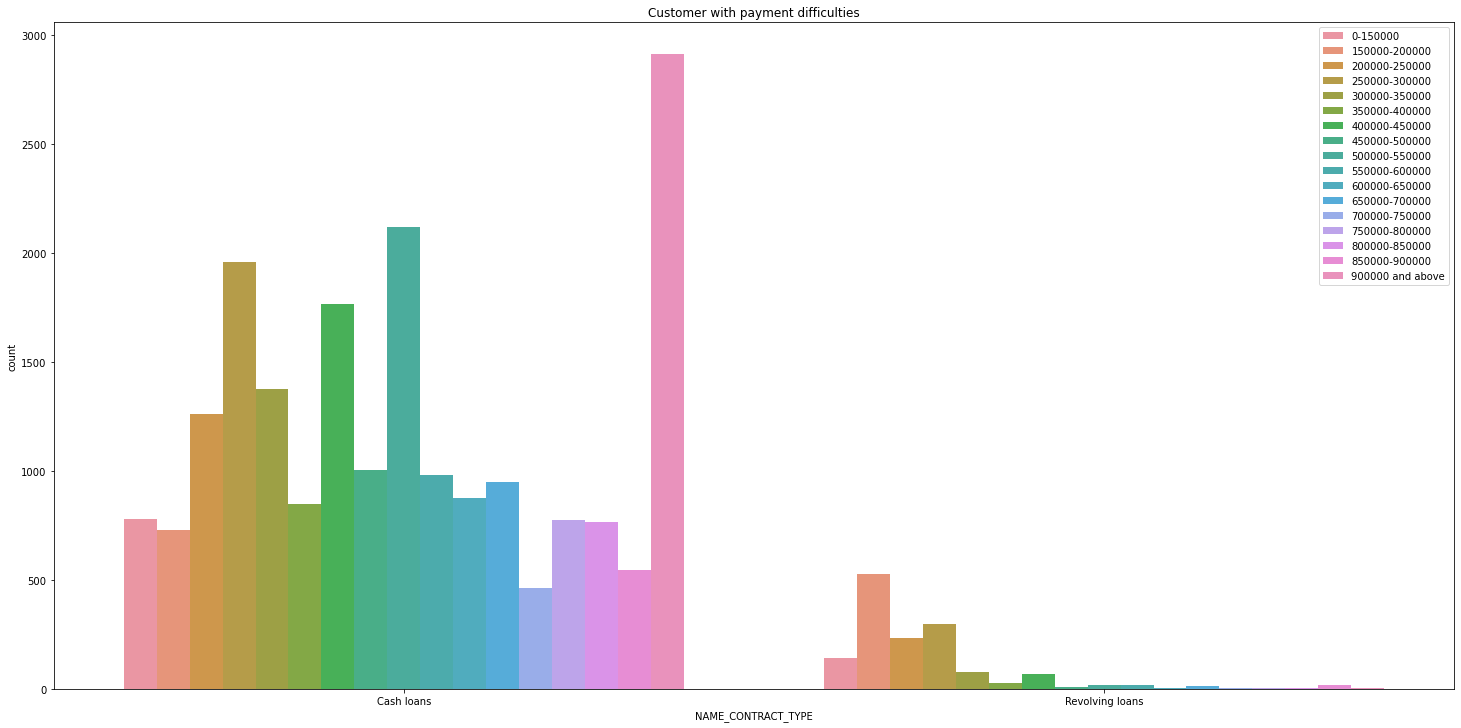

In [128]:
#bivariate analysis on NAME_CONTRACT_TYPE and Amt_Credit_Range for target_new 1

plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
sns.countplot(data=Target_new1,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.legend(loc='upper right')
plt.tight_layout()
plt.title('Customer with payment difficulties')
plt.show()

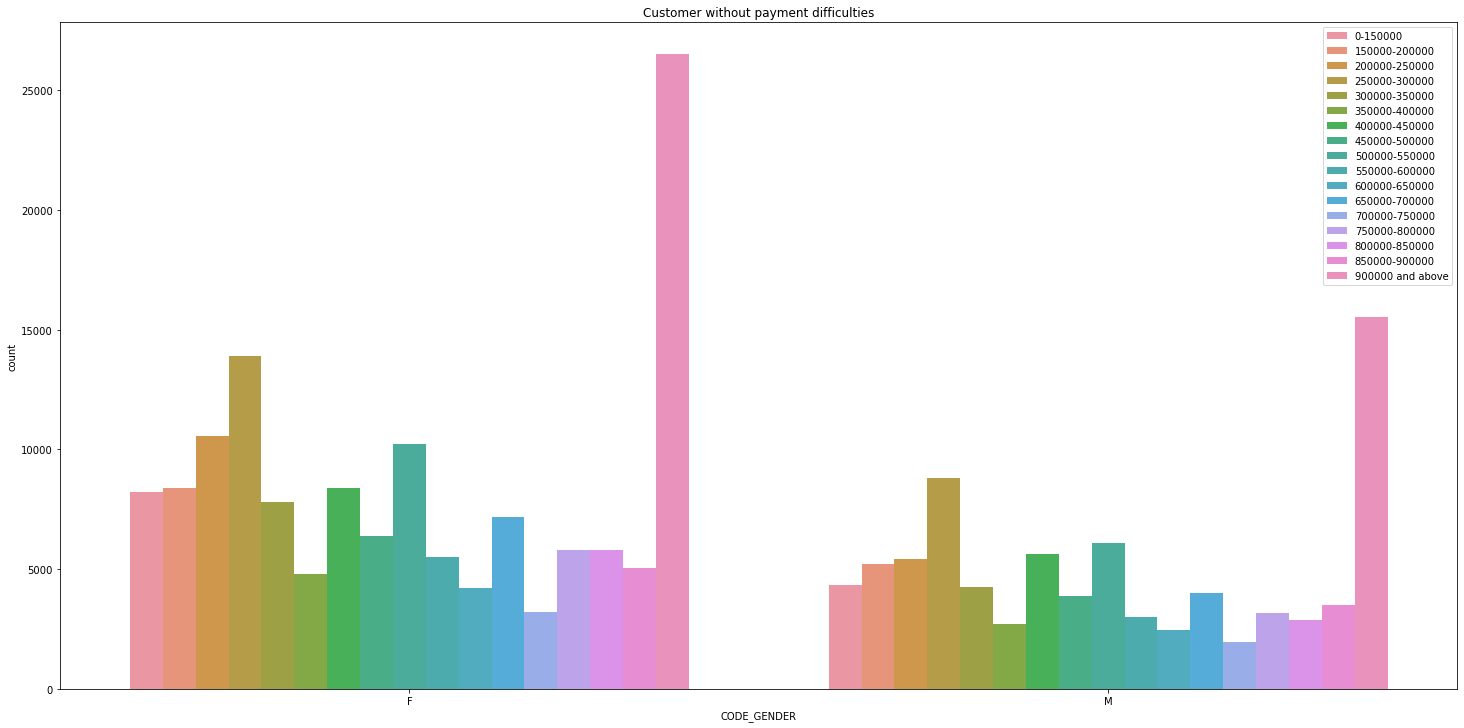

In [129]:
#bivariate analysis on CODE_GENDER and Amt_Credit_Range for target_new 0
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
sns.countplot(data=Target_new0,x='CODE_GENDER',hue='AMT_CREDIT_RANGE')
plt.legend(loc='upper right')
plt.tight_layout()
plt.title('Customer without payment difficulties')
plt.show()

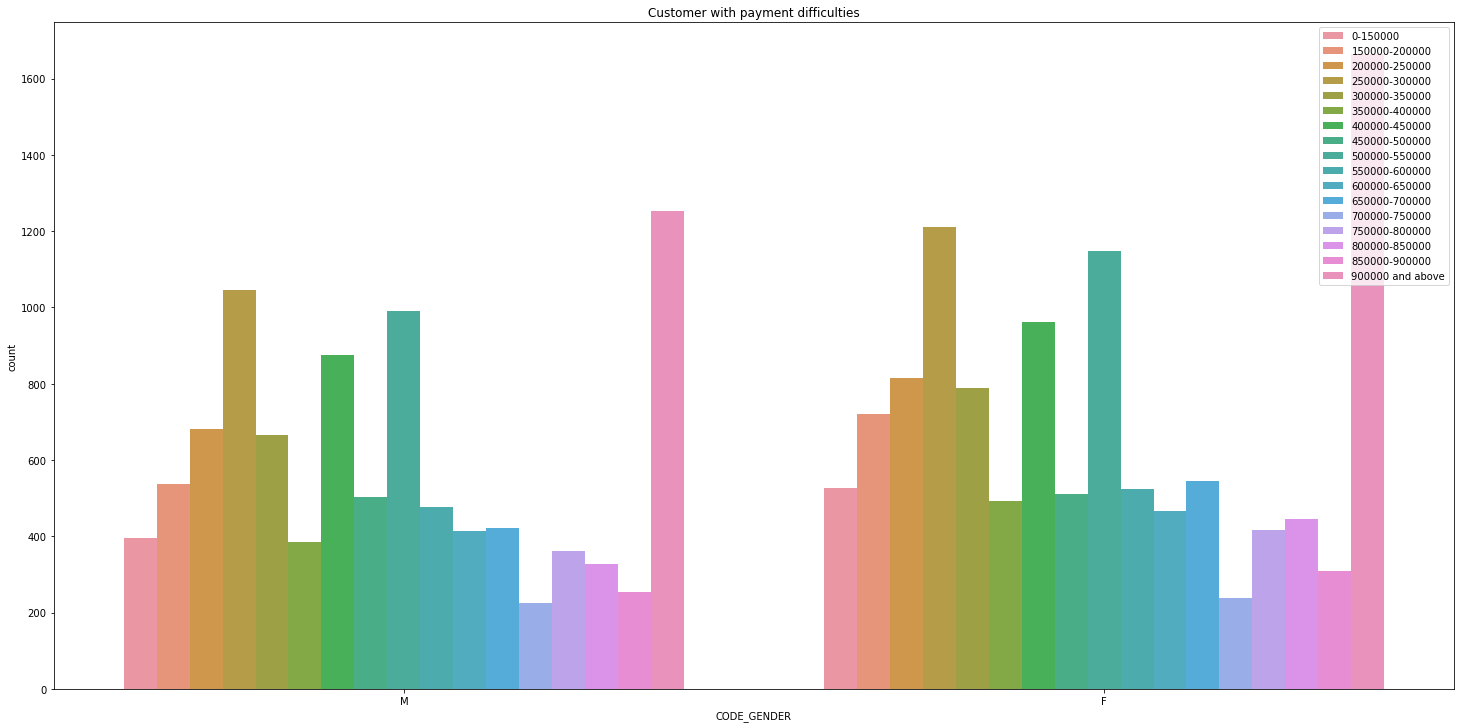

In [130]:
#bivariate analysis on CODE_GENDER and Amt_Credit_Range for target_new 
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
sns.countplot(data=Target_new1,x='CODE_GENDER',hue='AMT_CREDIT_RANGE')
plt.legend(loc='upper right')
plt.tight_layout()
plt.title('Customer with payment difficulties')
plt.show()

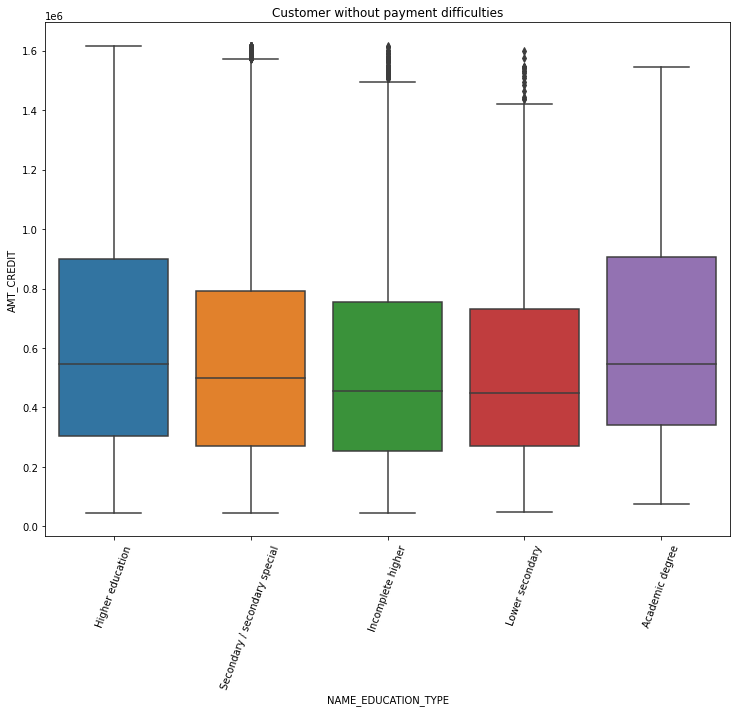

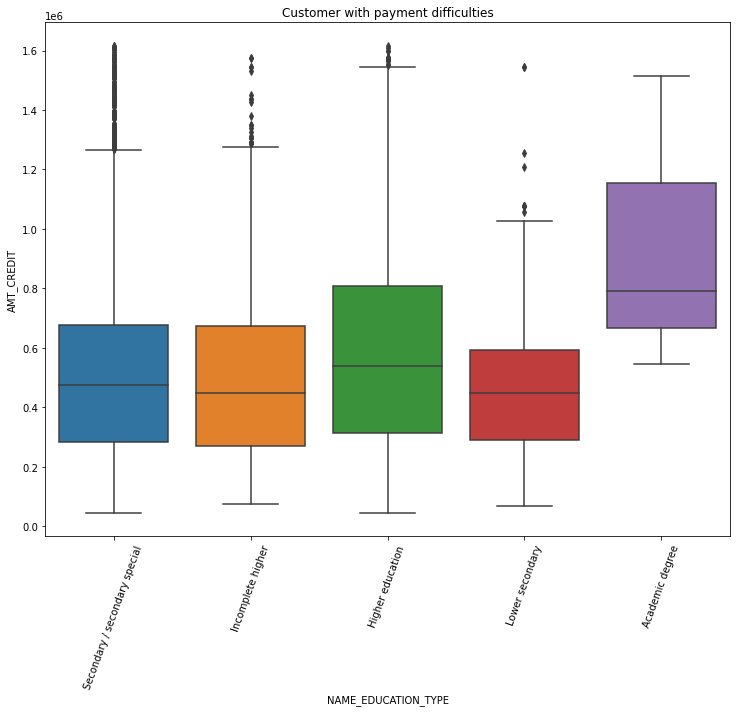

In [131]:
#bivariate analysis on AMT_CREDIT and NAME_EDUCATION_TYPE.

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

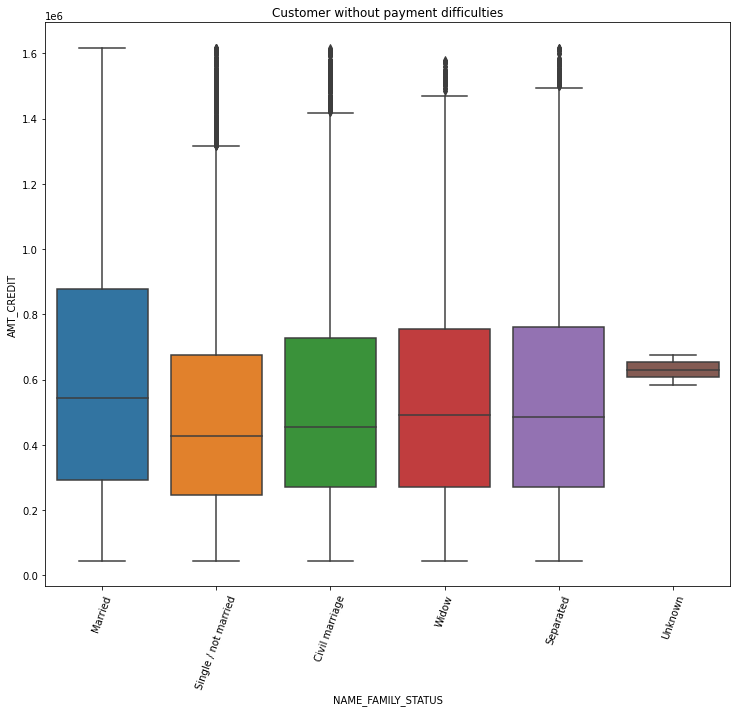

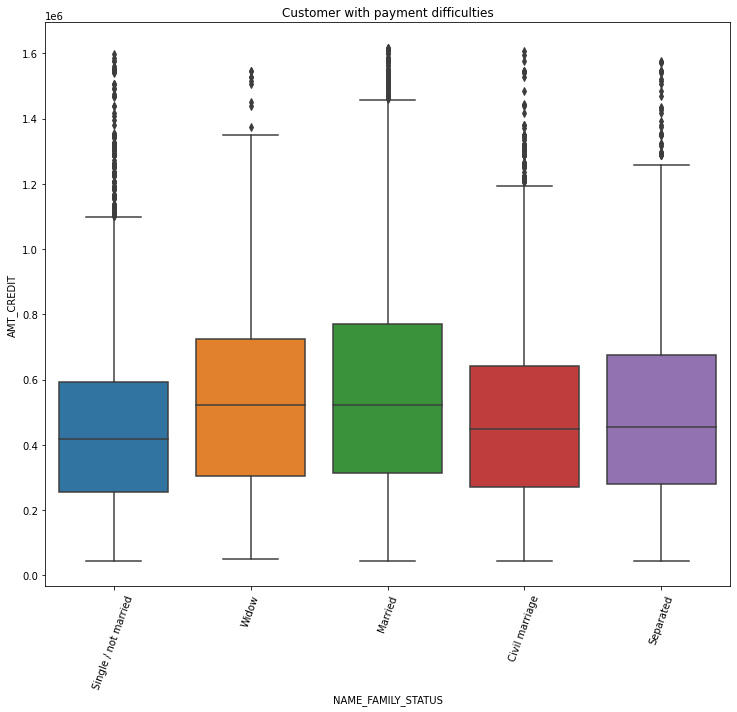

In [132]:
#bivariate analysis on AMT_CREDIT and NAME_FAMILY_STATUS.
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new0,y='AMT_CREDIT',x='NAME_FAMILY_STATUS')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new1,y='AMT_CREDIT',x='NAME_FAMILY_STATUS')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

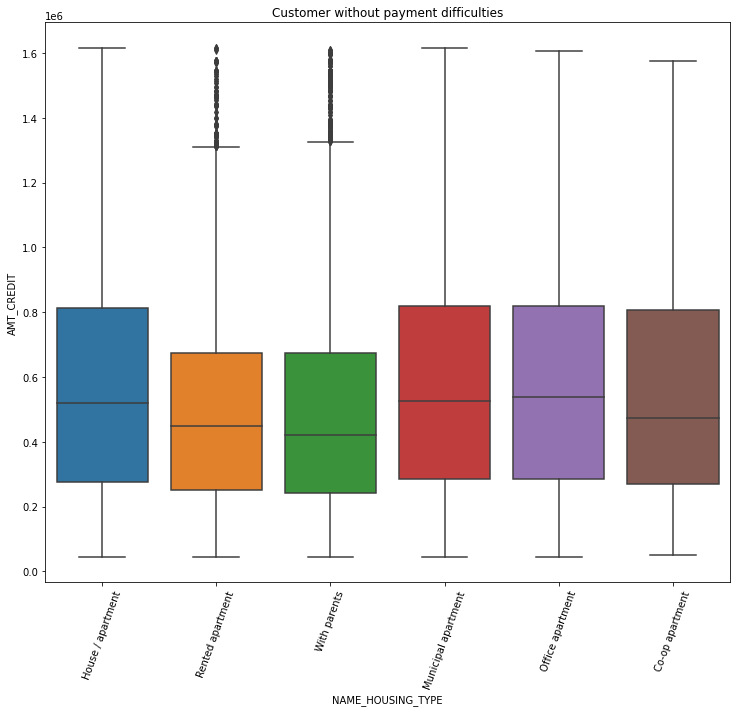

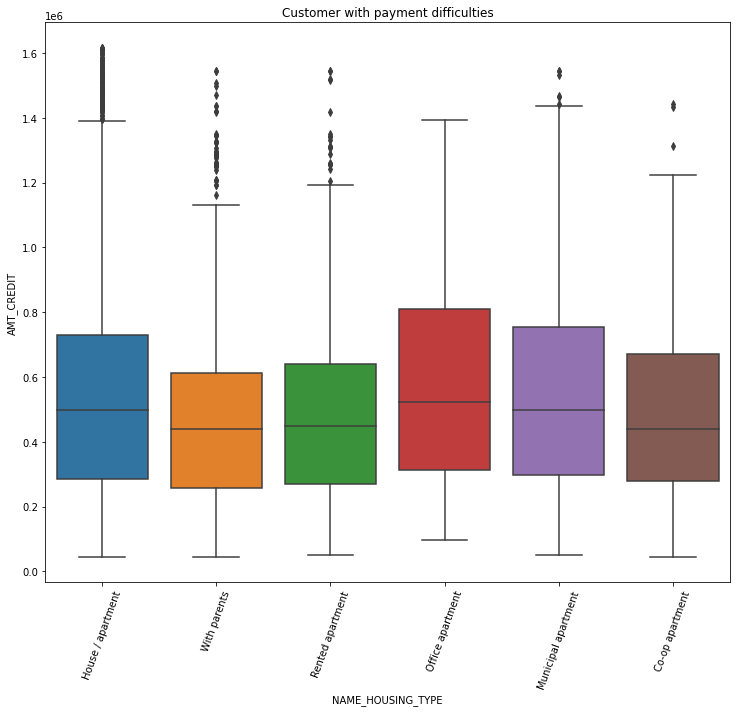

In [133]:
#bivariate analysis on AMT_CREDIT and NAME_HOUSING_TYPE.

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new0,y='AMT_CREDIT',x='NAME_HOUSING_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new1,y='AMT_CREDIT',x='NAME_HOUSING_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

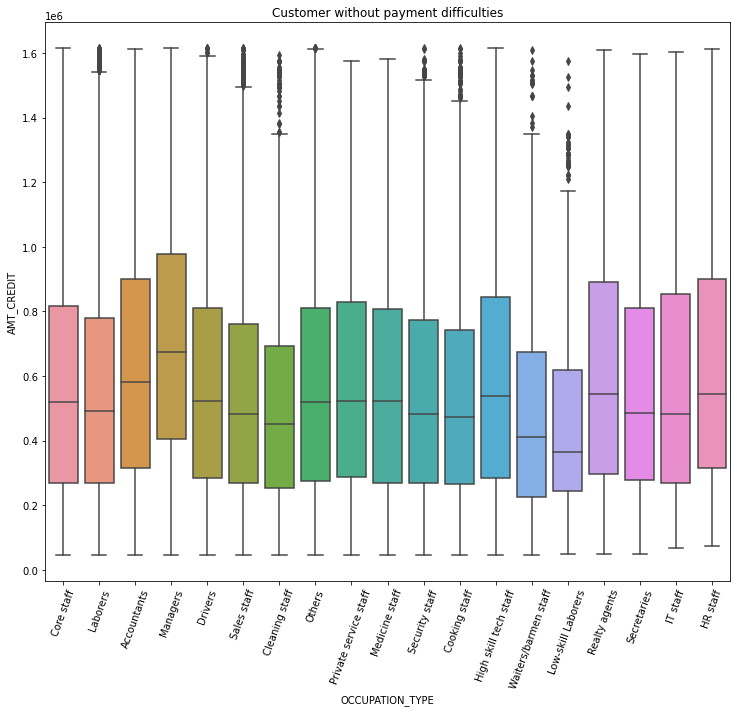

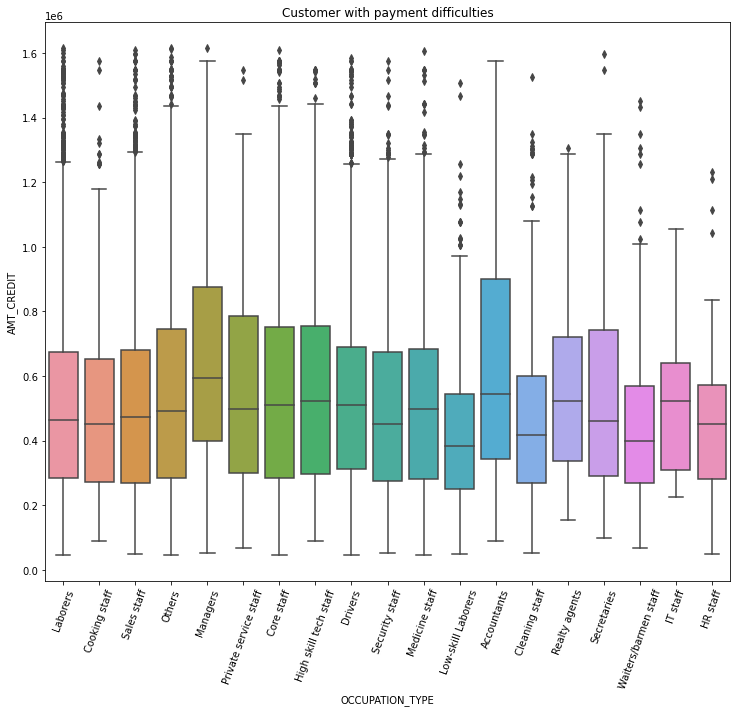

In [134]:
#bivariate analysis on AMT_CREDIT and OCCUPATION_TYPE.

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

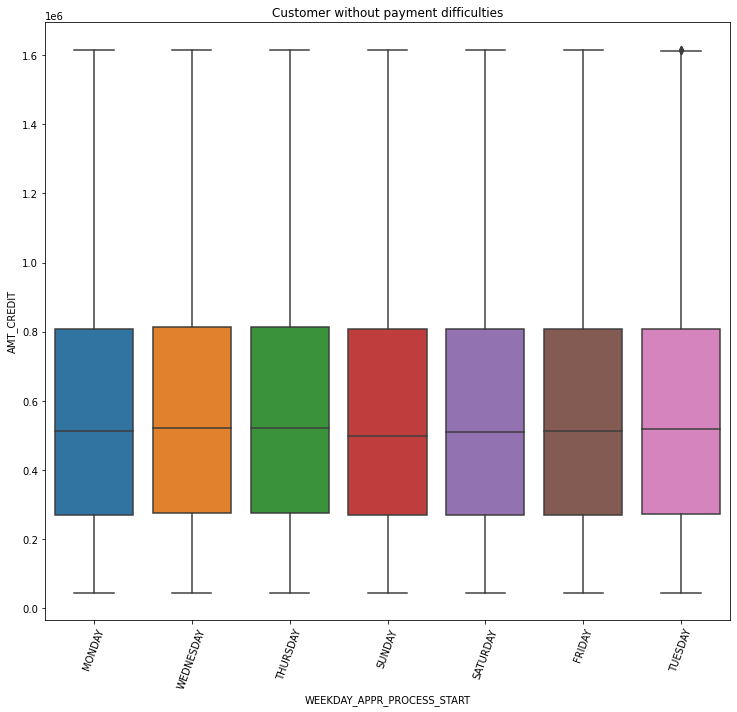

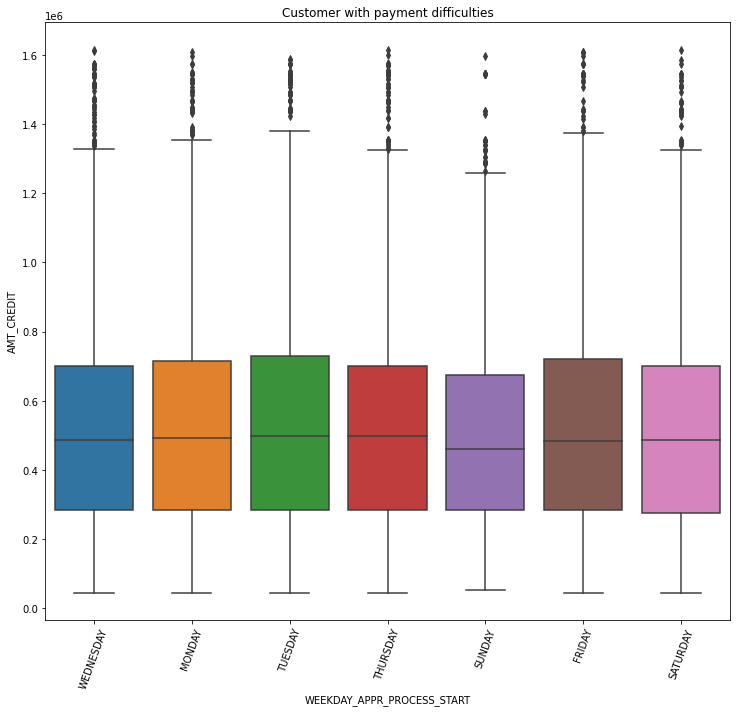

In [135]:
#bivariate analysis on AMT_CREDIT and WEEKDAY_APPR_PROCESS_START.

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new0,y='AMT_CREDIT',x='WEEKDAY_APPR_PROCESS_START')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new1,y='AMT_CREDIT',x='WEEKDAY_APPR_PROCESS_START')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

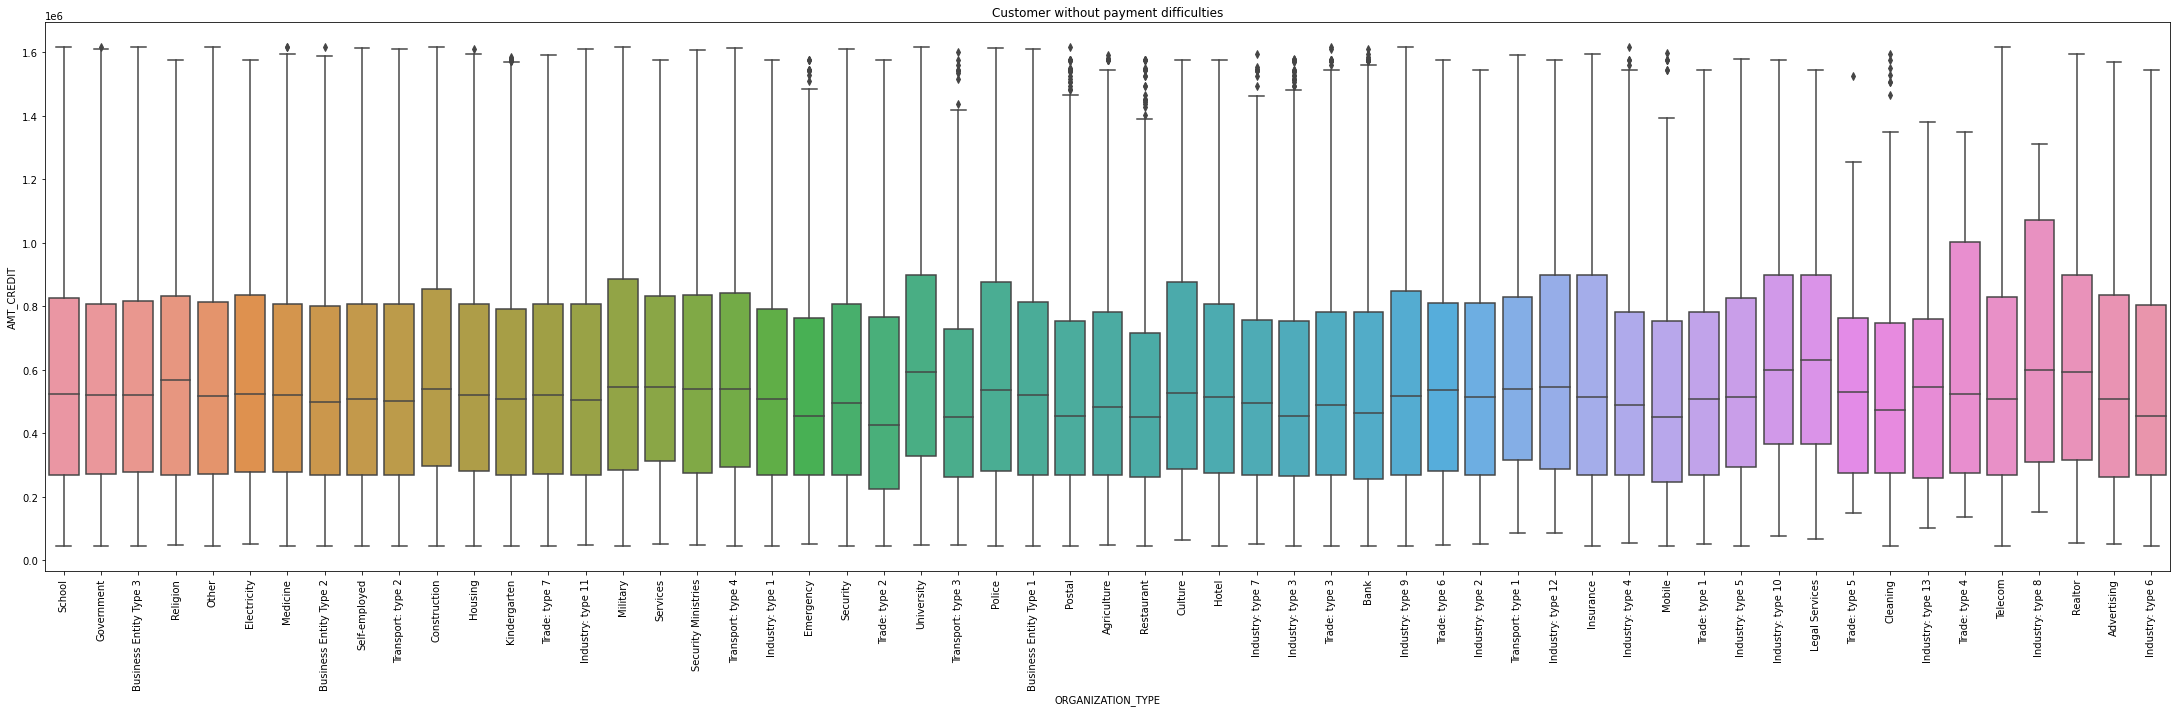

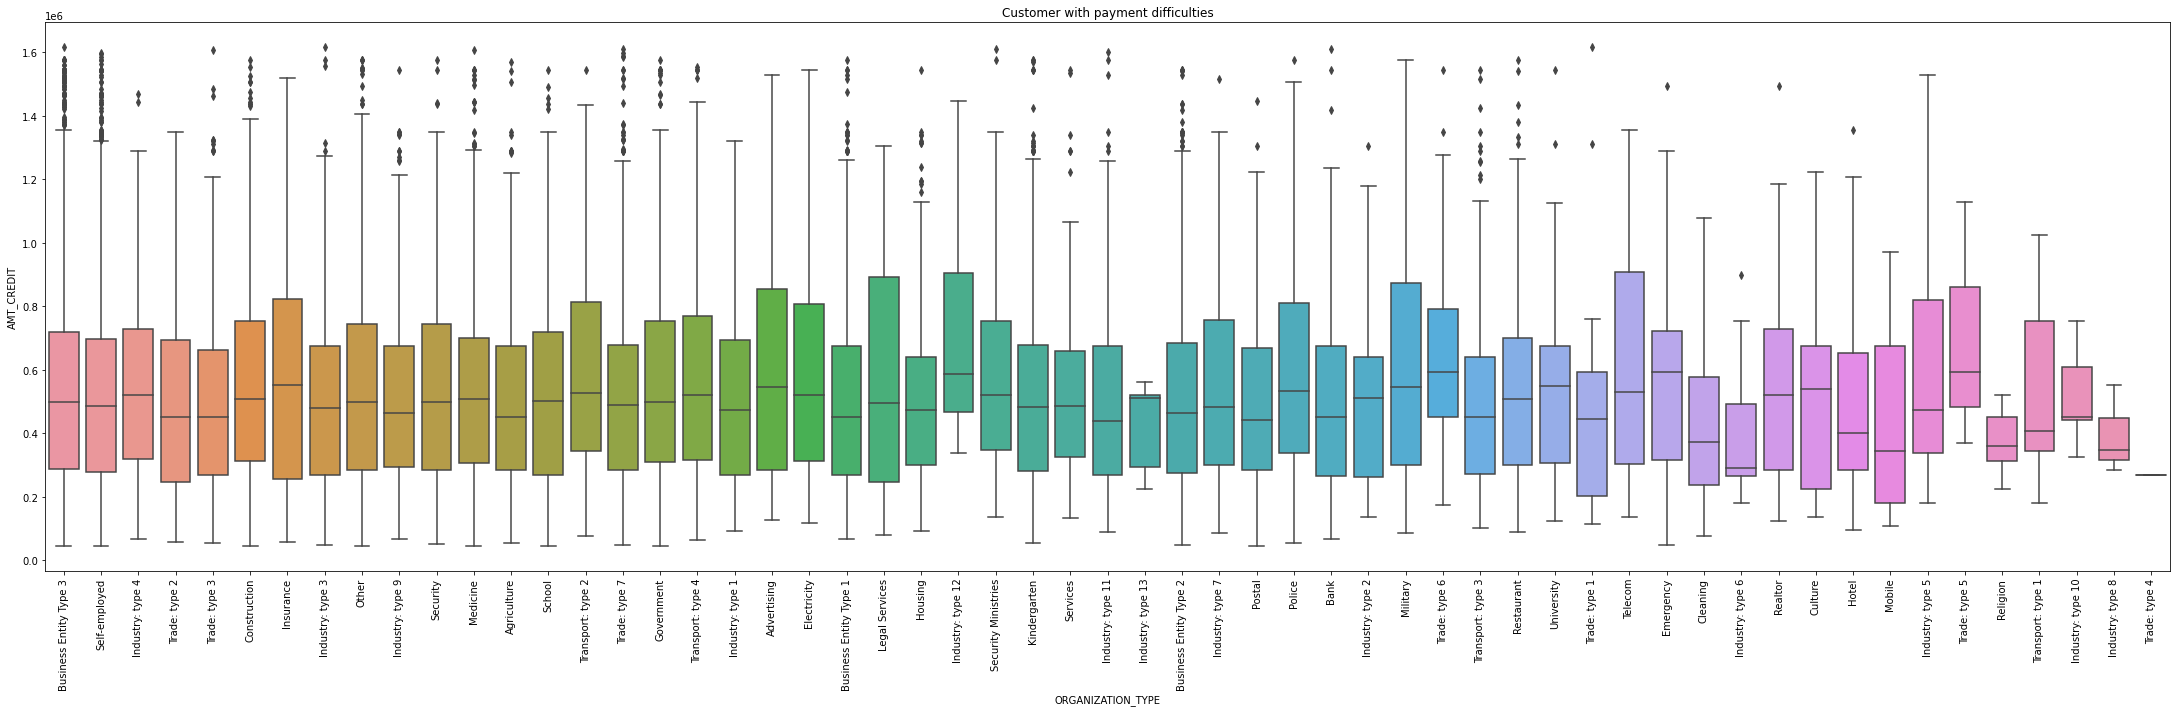

In [136]:
#bivariate analysis on AMT_CREDIT and ORGANIZATION_TYPE.

plt.figure(figsize=(60,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new0,y='AMT_CREDIT',x='ORGANIZATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(60,10))
plt.subplot(1,2,1)
sns.boxplot(data=Target_new1,y='AMT_CREDIT',x='ORGANIZATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

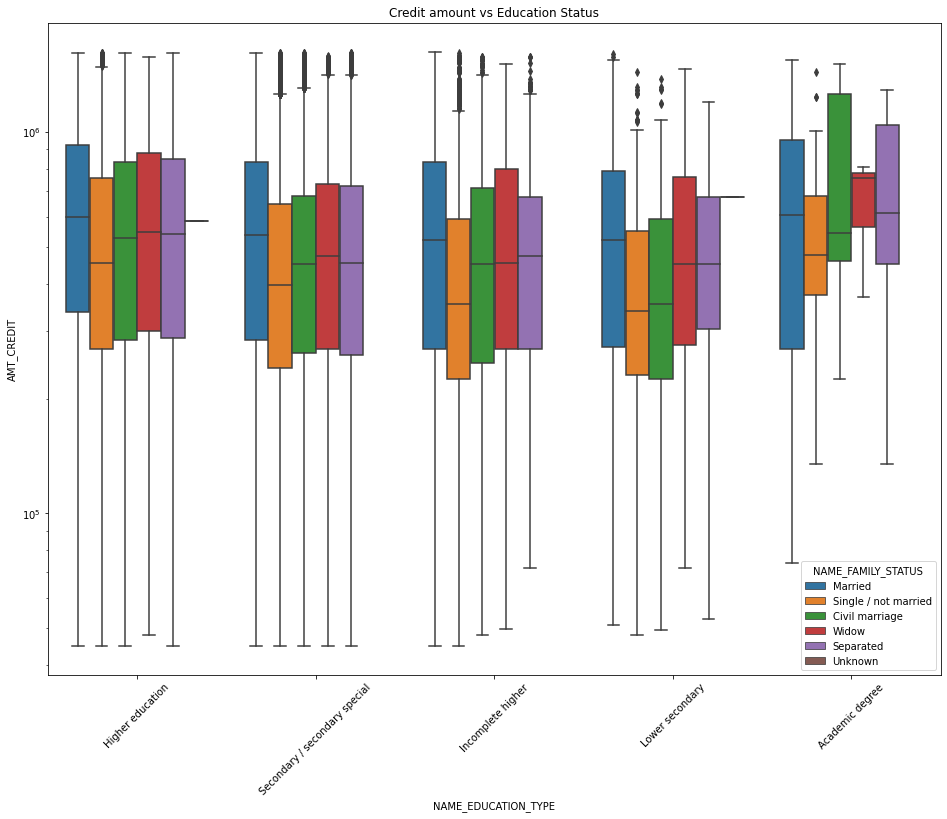

In [137]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =Target_new0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

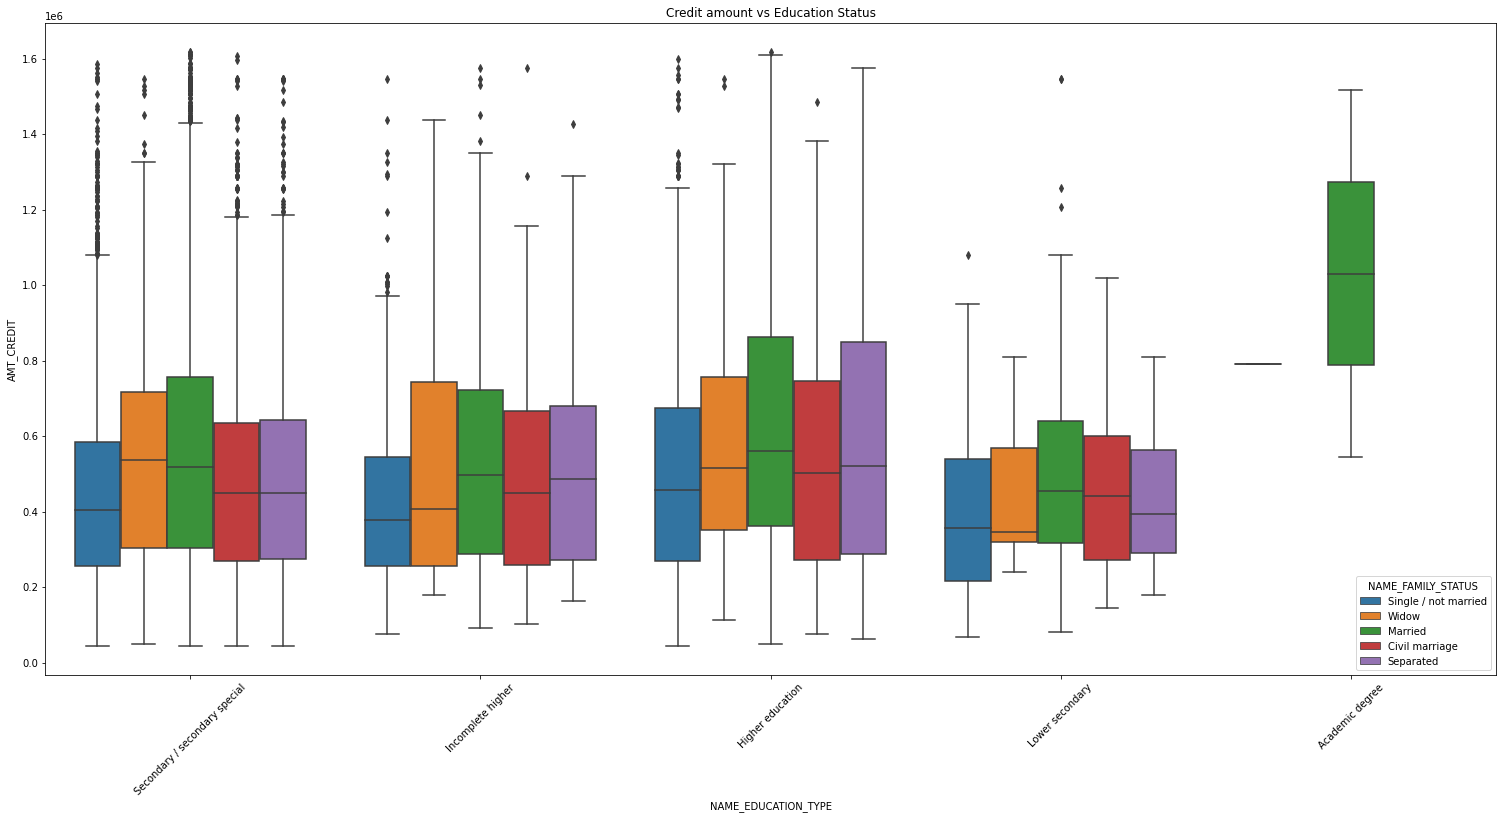

In [138]:
# Box plotting for Credit amount

plt.figure(figsize=(26,12))
plt.xticks(rotation=45)
sns.boxplot(data =Target_new1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

# Previous Application

In [139]:
df=pd.read_csv('previous_application.csv')

In [140]:
df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [169]:
df.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [171]:
df=df.drop(df[df['NAME_CLIENT_TYPE']=='XNA'].index)

In [172]:
merged_dataset = pd.merge(left =df1, right =df, how= 'inner', on='SK_ID_CURR')

In [173]:
merged_dataset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0     100002       1           Cash loans           M            N   
1     100003       0           Cash loans           F            N   
2     100003       0           Cash loans           F            N   
3     100003       0           Cash loans           F            N   
4     100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        24700.5          Working  Secondary / secondary special   
1        35698.5    State servant               Higher education   
2        35698.5    State servant               Higher education   
3        35698.5    State servant               Higher education   
4         6750.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   Birth_day  Emp_date   Reg_year  Publish_id OCCUPATION_TYPE  \
0  25.920548  1.745205   9.994521    5.808219        Laborers   
1  45.931507  3.254795   3.249315    0.797260      Core staff   
2  45.931507  3.254795   3.249315    0.797260      Core staff   
3  45.931507  3.254795   3.249315    0.797260      Core staff   
4  52.180822  0.616438  11.671233    6.934247        Laborers   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Government   

  AMT_INCOME_RANGE  AMT_CREDIT_RANGE  SK_ID_PREV NAME_CONTRACT_TYPE_y  \
0    200000-225000     400000-450000     1038818       Consumer loans   
1    250000-275000  900000 and above     1810518           Cash loans   
2    250000-275000  900000 and above     2636178       Consumer loans   
3    250000-275000  900000 and above     2396755       Consumer loans   
4      50000-750

In [174]:
merged_dataset.shape

(1076243, 67)

In [176]:
merged_dataset.NAME_CLIENT_TYPE.value_counts()

Repeater     784151
New          202982
Refreshed     89110
Name: NAME_CLIENT_TYPE, dtype: int64

In [177]:
merged_dataset['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.746610
Refused         17.737630
Canceled        17.675098
Unused offer     1.840662
Name: NAME_CONTRACT_STATUS, dtype: float64

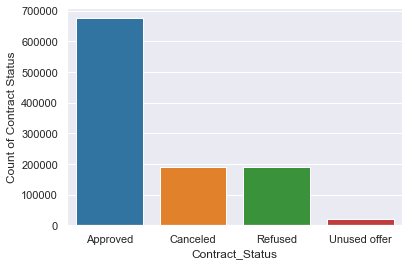

In [178]:
sns.countplot(merged_dataset['NAME_CONTRACT_STATUS'])
plt.xlabel('Contract_Status')
plt.ylabel('Count of Contract Status')
plt.show()

In [179]:
merged_dataset=merged_dataset.drop(merged_dataset[merged_dataset['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
merged_dataset=merged_dataset.drop(merged_dataset[merged_dataset['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
merged_dataset=merged_dataset.drop(merged_dataset[merged_dataset['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)


merged_dataset.shape

(48549, 67)

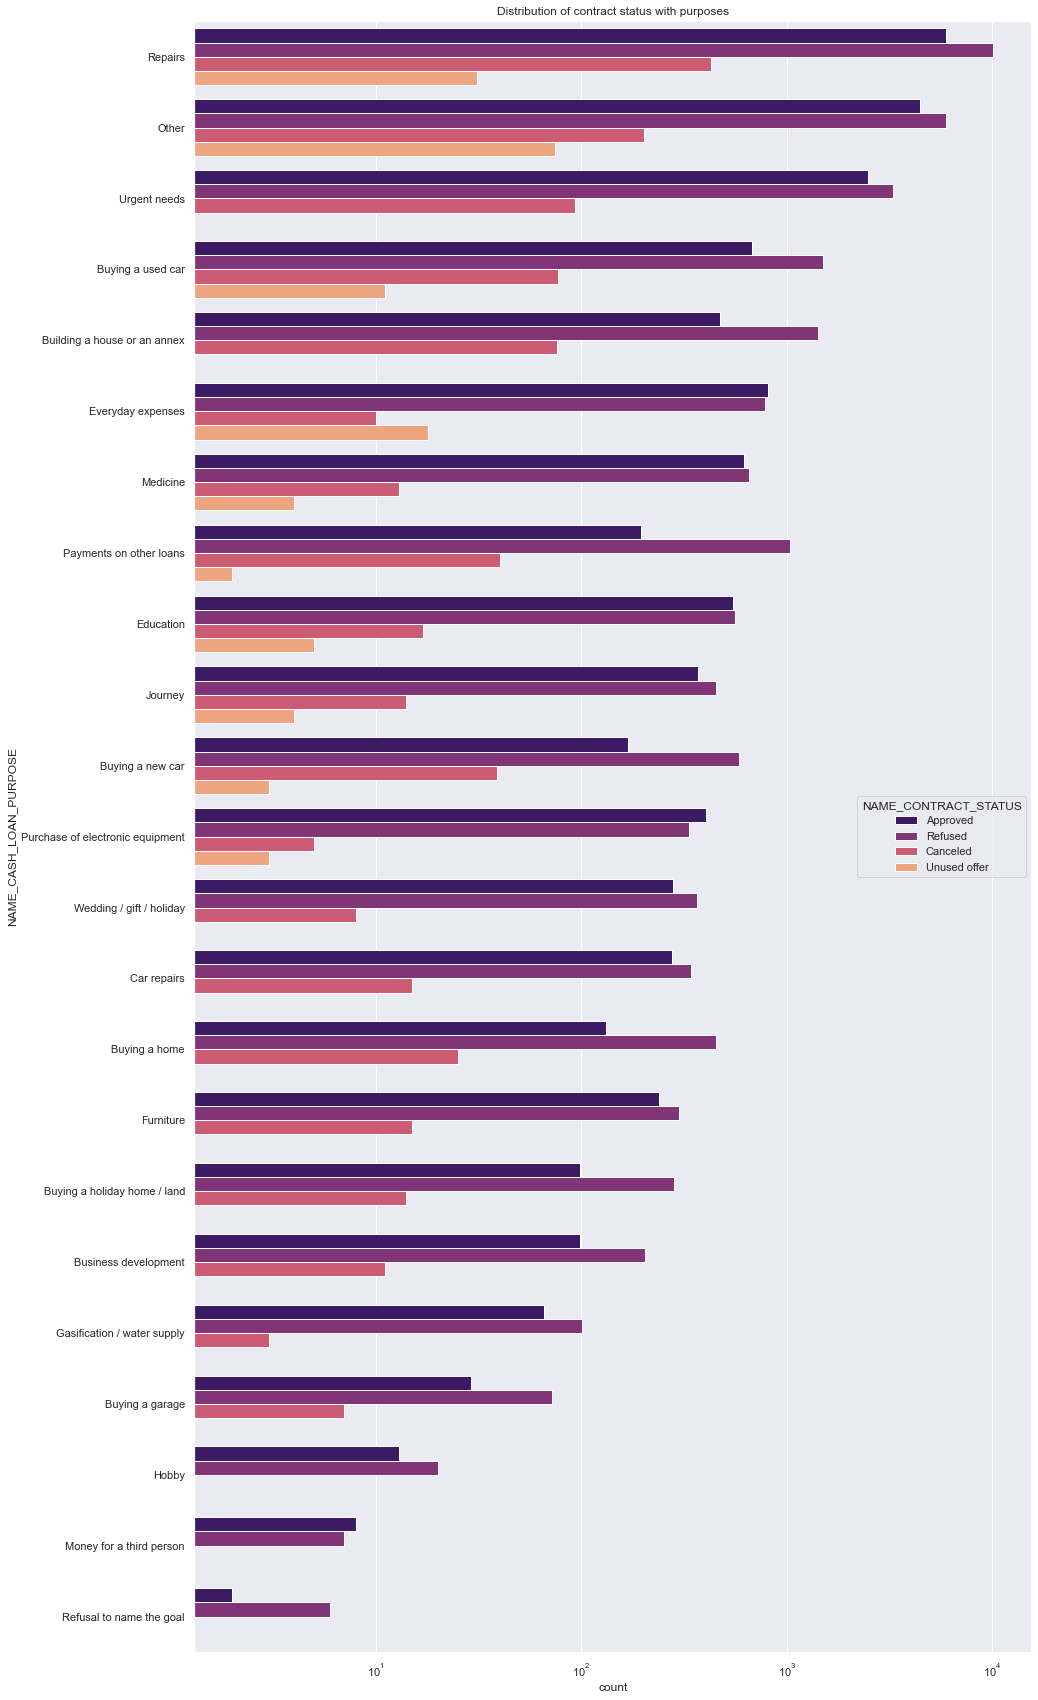

In [180]:
# Distribution of contract status in cash loan purpose

sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merged_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

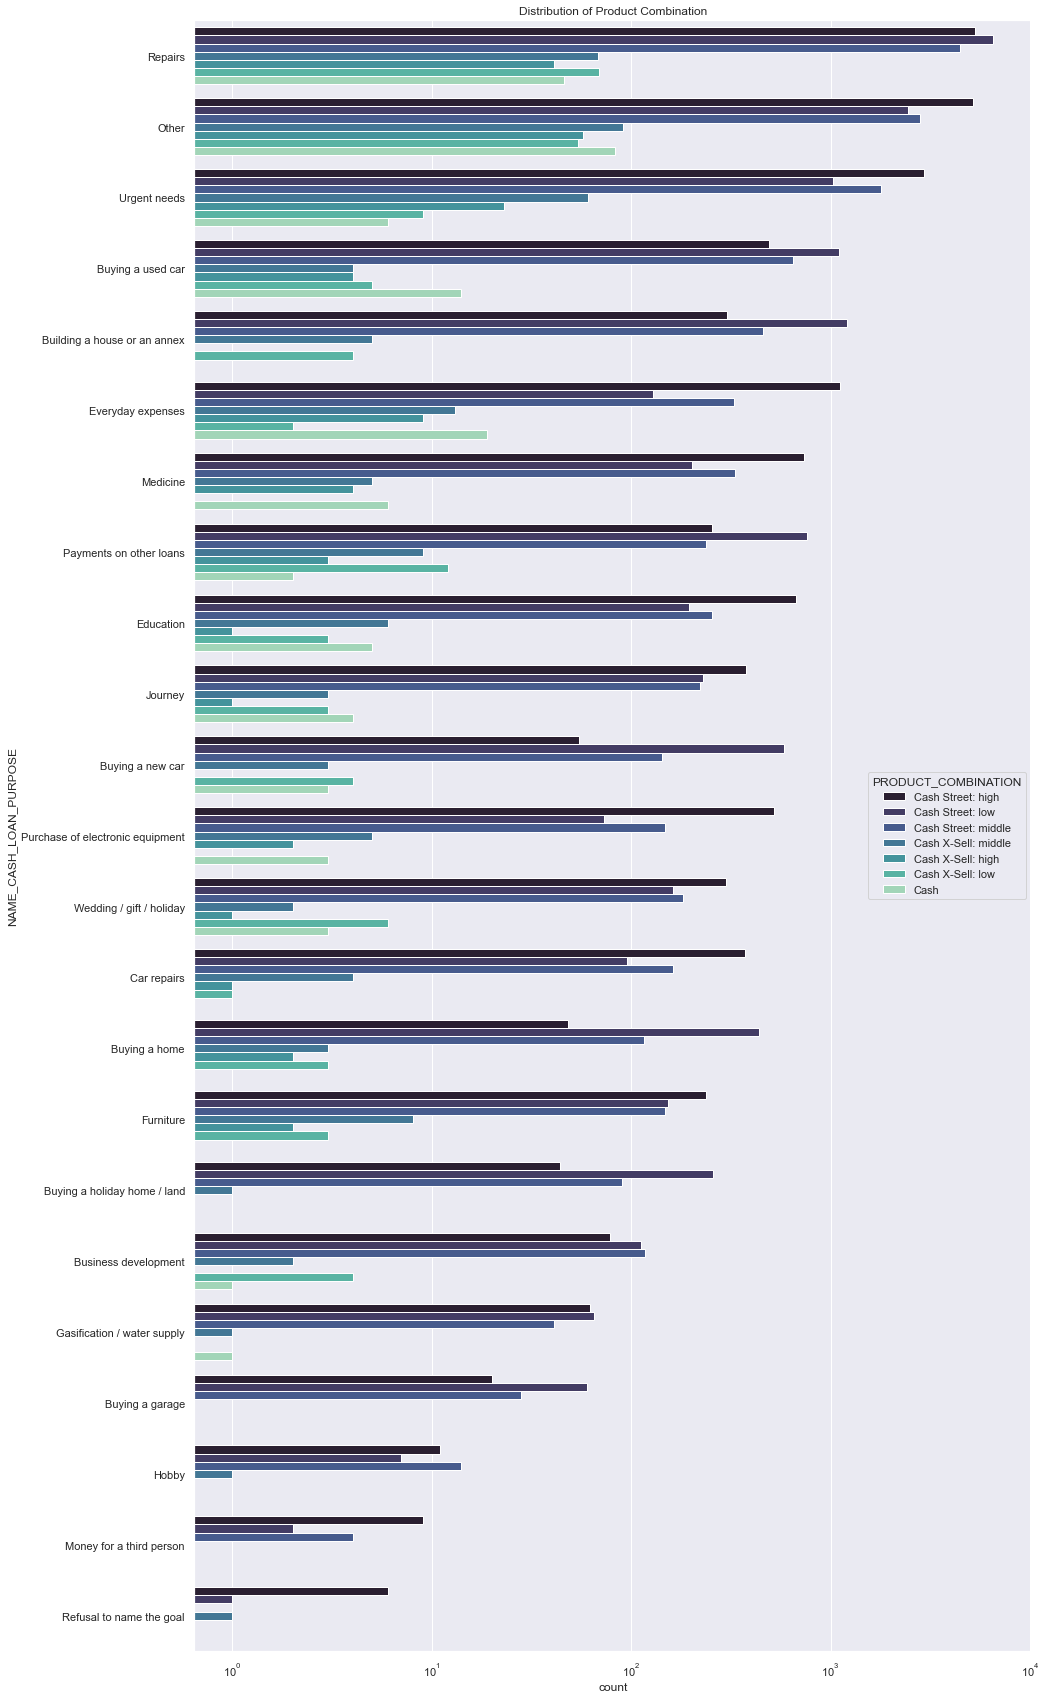

In [181]:
# Distribution of of Product Combination in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Product Combination')
ax = sns.countplot(data = merged_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'PRODUCT_COMBINATION',palette='mako') 

In [182]:
merged_dataset.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             16524
Other                               10732
Urgent needs                         5867
Buying a used car                    2273
Building a house or an annex         1967
Everyday expenses                    1618
Medicine                             1287
Payments on other loans              1280
Education                            1133
Journey                               838
Buying a new car                      794
Purchase of electronic equipment      748
Wedding / gift / holiday              653
Car repairs                           633
Buying a home                         610
Furniture                             551
Buying a holiday home / land          393
Business development                  314
Gasification / water supply           170
Buying a garage                       108
Hobby                                  33
Money for a third person               15
Refusal to name the goal                8
Name: NAME_CASH_LOAN_PURPOSE, dtyp

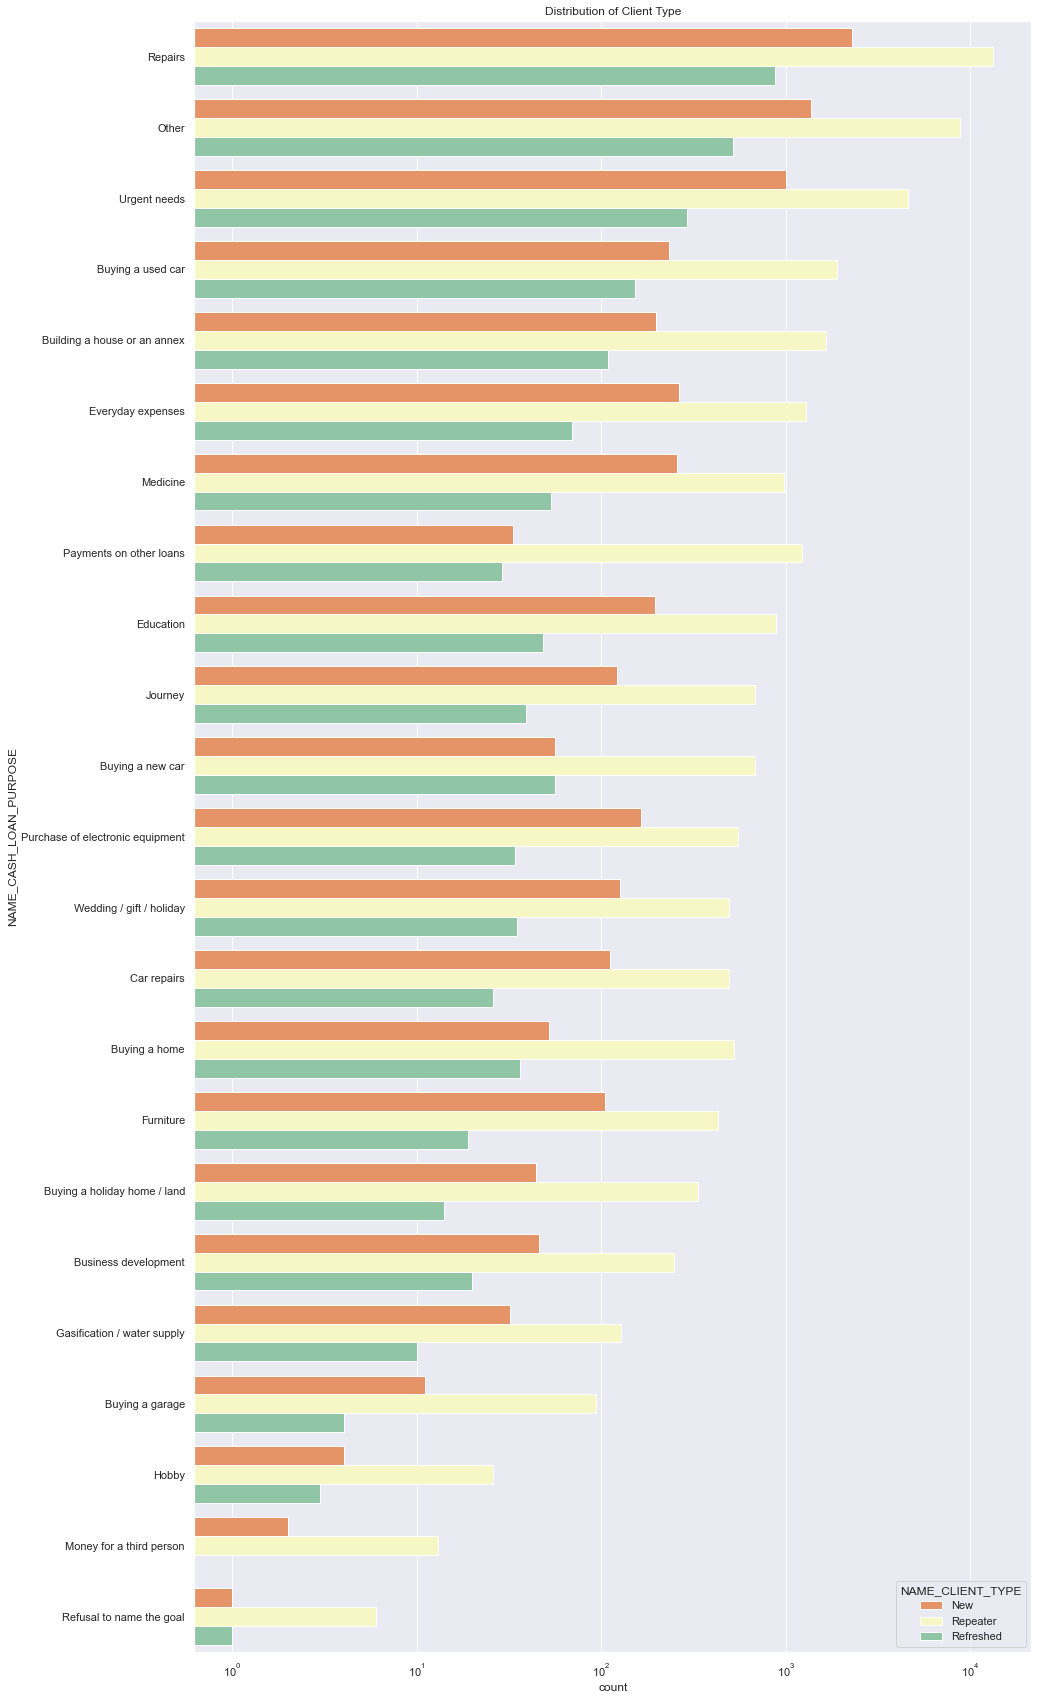

In [183]:
# Distribution of of Client Type

sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Client Type')
ax = sns.countplot(data = merged_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                   hue = 'NAME_CLIENT_TYPE',palette='Spectral') 

In [184]:
merged_dataset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
89      100034       0      Revolving loans           M            N   
100     100035       0           Cash loans           F            N   
126     100039       0           Cash loans           M            Y   
141     100046       0      Revolving loans           M            Y   
142     100046       0      Revolving loans           M            Y   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
89                Y             0           90000.0      180000.0   
100               Y             0          292500.0      665892.0   
126               N             1          360000.0      733315.5   
141               Y             0          180000.0      540000.0   
142               Y             0          180000.0      540000.0   

     AMT_ANNUITY_x      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
89          9000.0               Working               Higher education   
100        24592.5  Commercial associate  Secondary / secondary special   
126        39069.0  Commercial associate  Secondary / secondary special   
141        27000.0               Working               Higher education   
142        27000.0               Working               Higher education   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
89   Single / not married       With parents                    0.030755   
100        Civil marriage  House / apartment                    0.025164   
126               Married  House / apartment                    0.015221   
141               Married  House / apartment                    0.025164   
142               Married  House / apartment                    0.025164   

     Birth_day  Emp_date   Reg_year  Publish_id OCCUPATION_TYPE  \
89   28.331507  2.767123  13.147945    8.260274        Laborers   
100  41.863014  7.309589  14.427397   10.375342          Others   
126  32.038356  5.643836   9.745205    9.745205         Drivers   
141  44.180822  4.824658  22.564384   11.758904        Managers   
142  44.180822  4.824658  22.564384   11.758904        Managers   

    WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
89                       TUESDAY                         16   
100                    WEDNESDAY                         13   
126                     THURSDAY                         10   
141                      TUESDAY                          8   
142                      TUESDAY                          8   

     REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
89                            0                           0   
100                           0                           0   
126                           0                           0   
141                           0                           0   
142                           0                           0   

     LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
89                             0                       0   
100                            0                       0   
126                            0                       1   
141                            0                       0   
142                            0                       0   

     REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
89                        0                        0  Business Entity Type 3   
100                       0                        0  Business Entity Type 3   
126                       1                        0           Self-employed   
141                       0                        0  Business Entity Type 3   
142                       0                        0  Business Entity Type 3   

    AMT_INCOME_RANGE AMT_CREDIT_RANGE  SK_ID_PREV NAME_CONTRACT_TYPE_y  \
89      75000,100000    150000-200000     1390369           Cash loans   
100    275000-300000    650000-700000     1344613           Cash loans   
126    350000-375000   

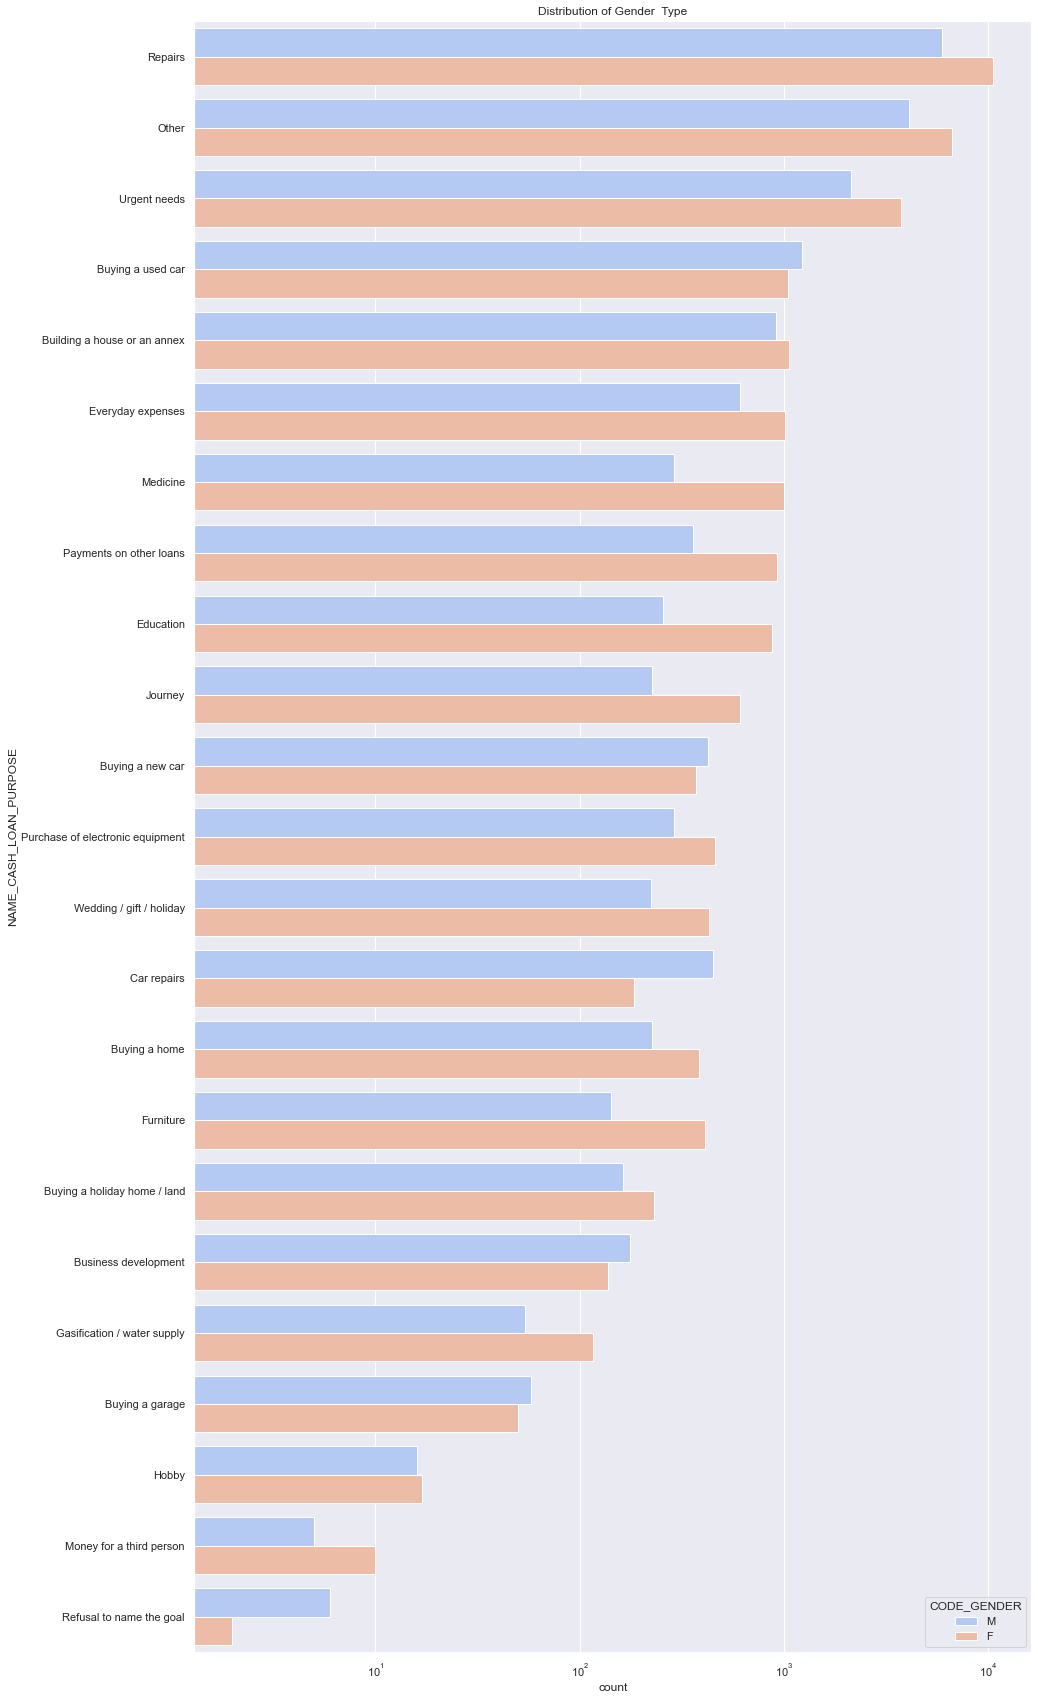

In [185]:
# Distribution of gender wise

sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Gender  Type')
ax = sns.countplot(data = merged_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'CODE_GENDER',palette='coolwarm') 

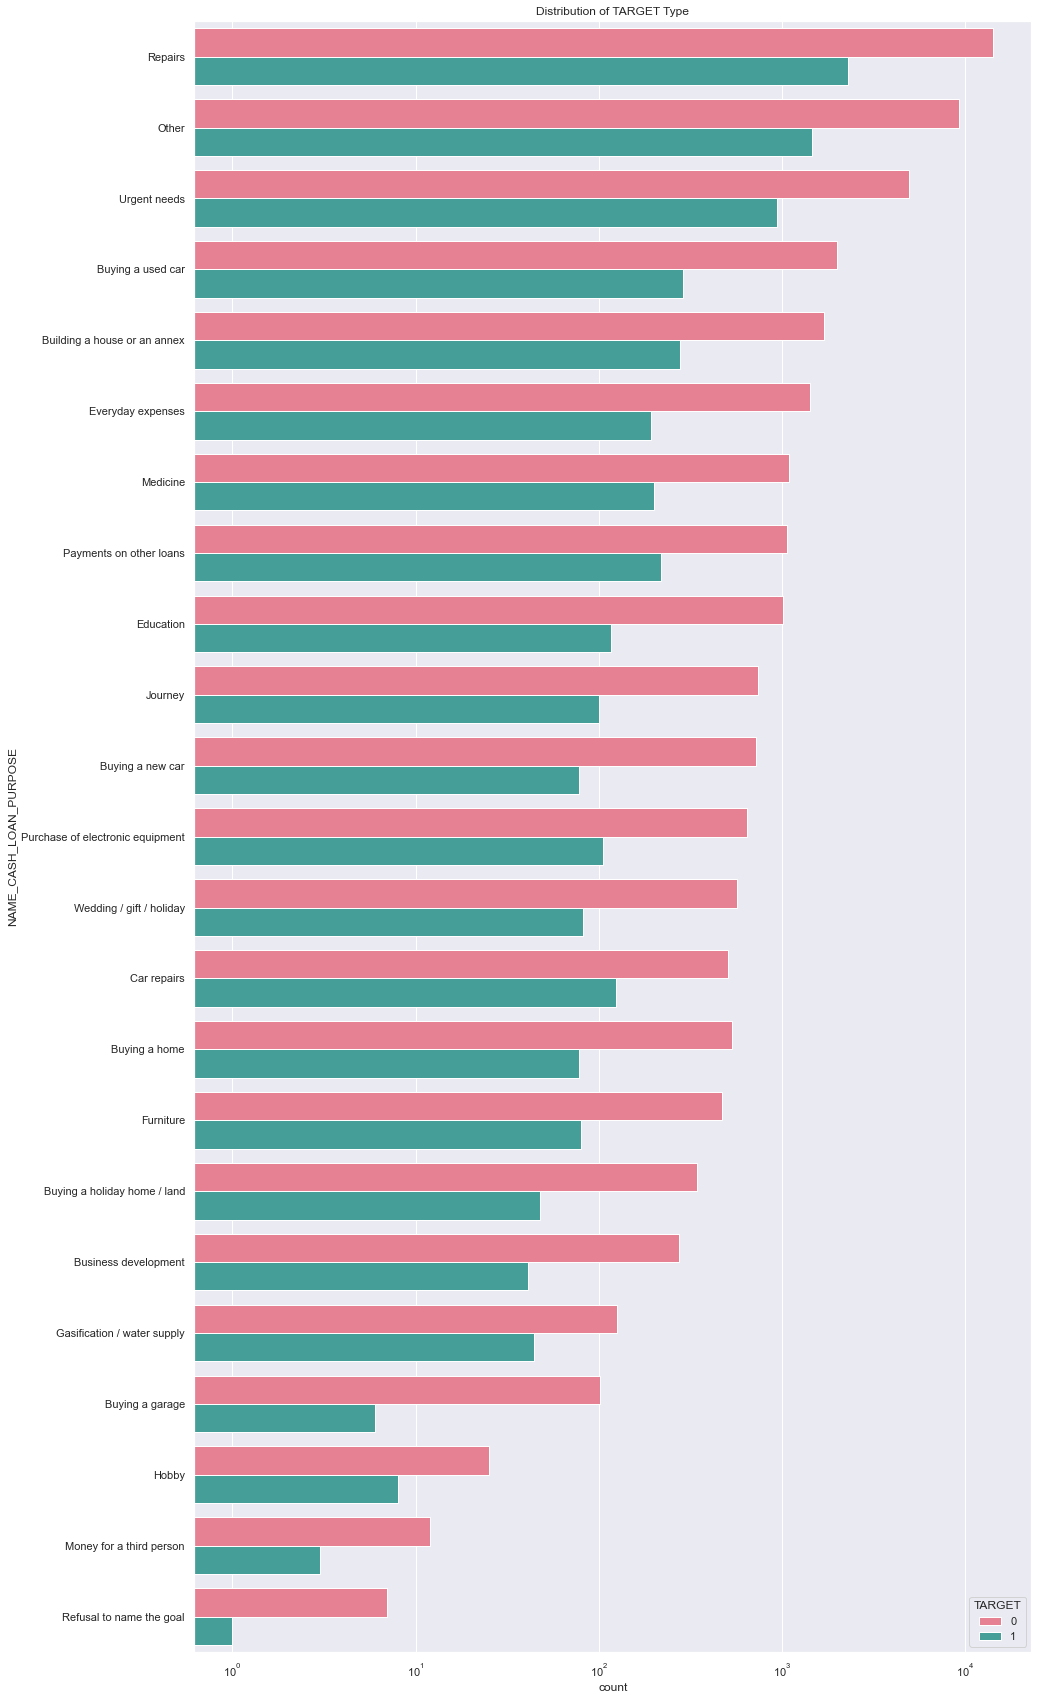

In [186]:
# Distribution of TARGET wise

sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of TARGET Type')
ax = sns.countplot(data = merged_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='husl')

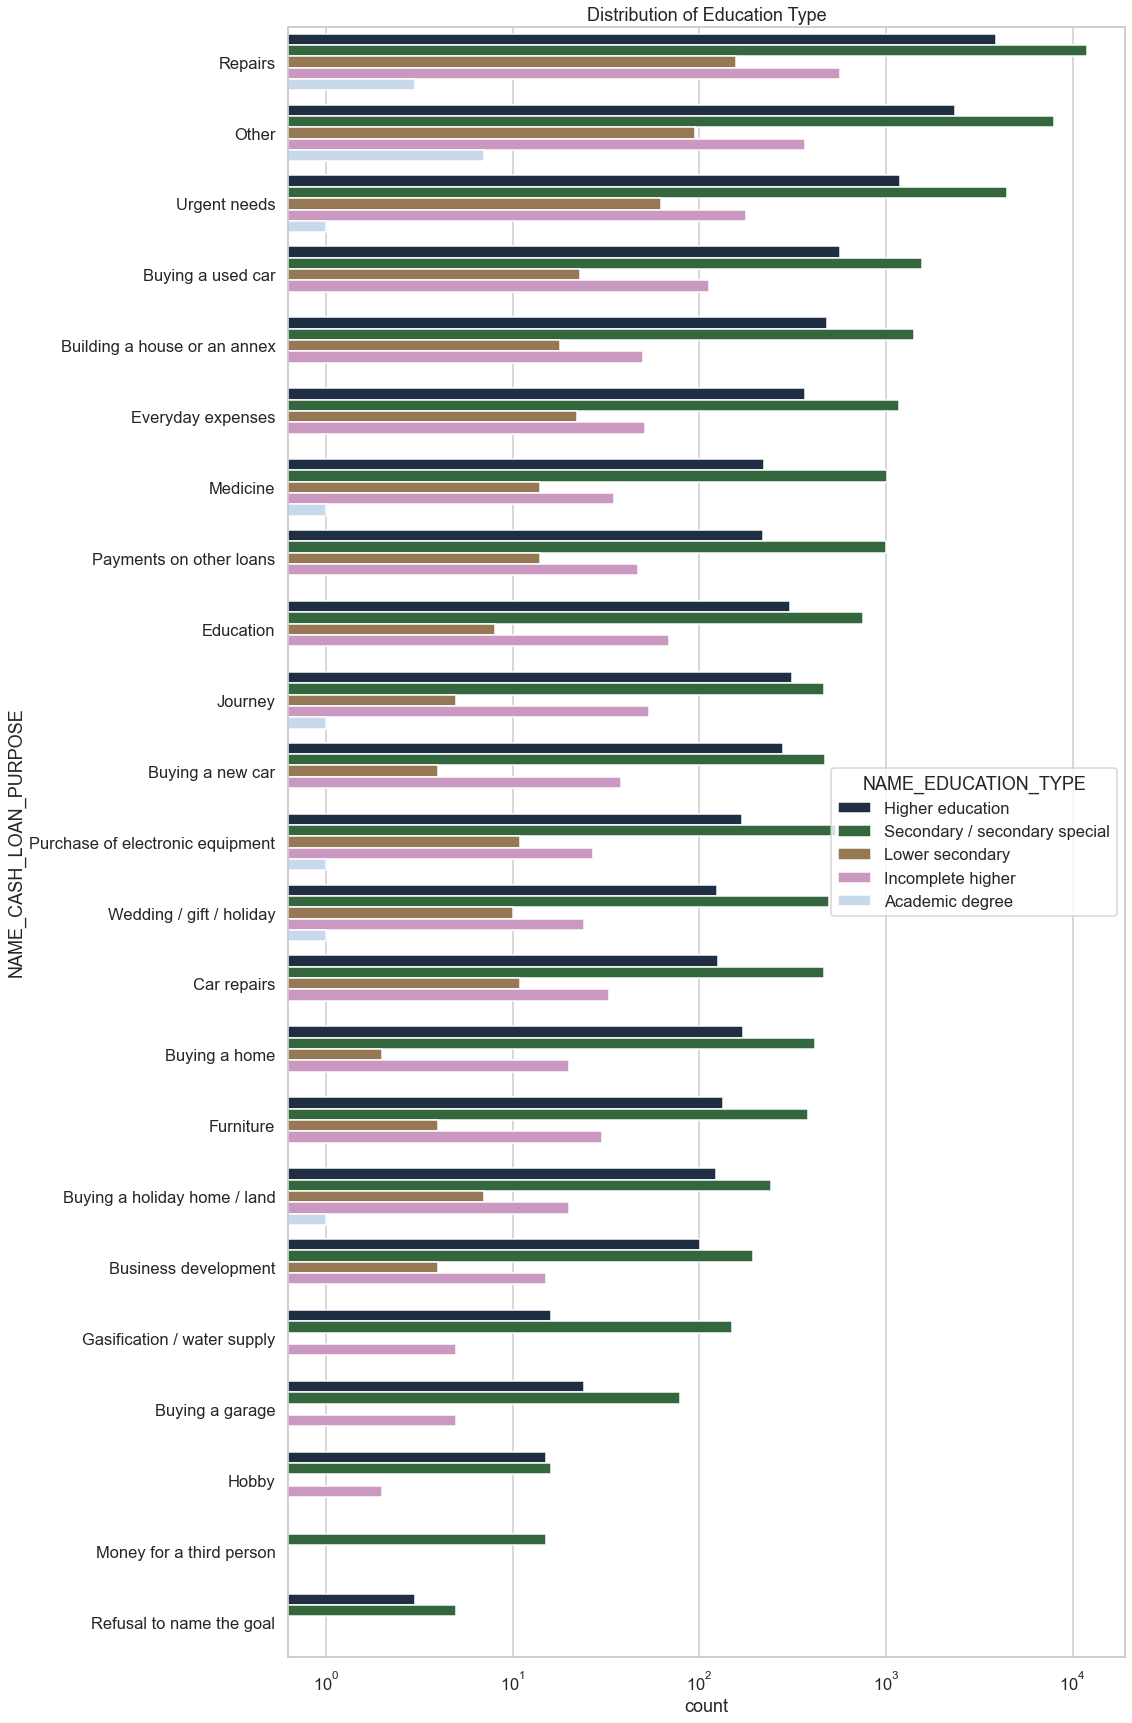

In [187]:
# Distribution of Education wise

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Education Type')
ax = sns.countplot(data = merged_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                   hue = 'NAME_EDUCATION_TYPE',palette='cubehelix')

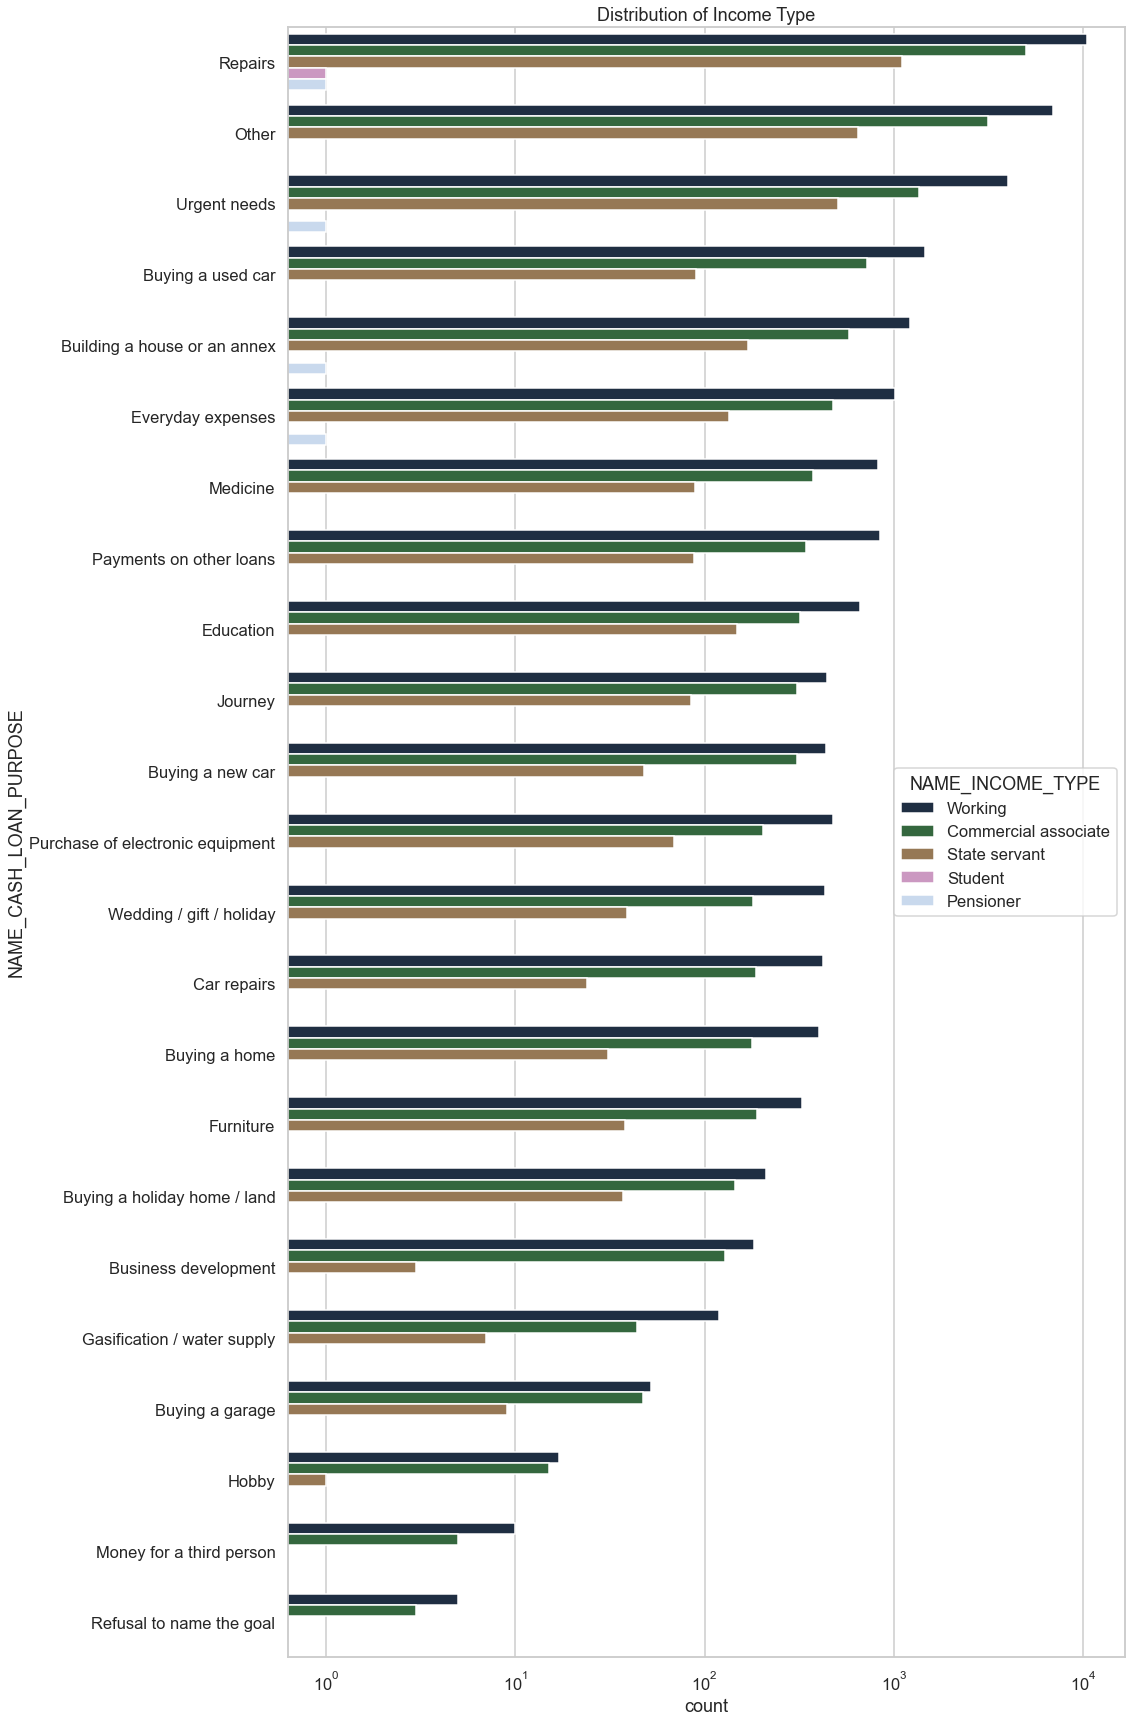

In [188]:
# Distribution of Income wise

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Income Type')
ax = sns.countplot(data = merged_dataset, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_dataset['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                   hue = 'NAME_INCOME_TYPE',palette='cubehelix')

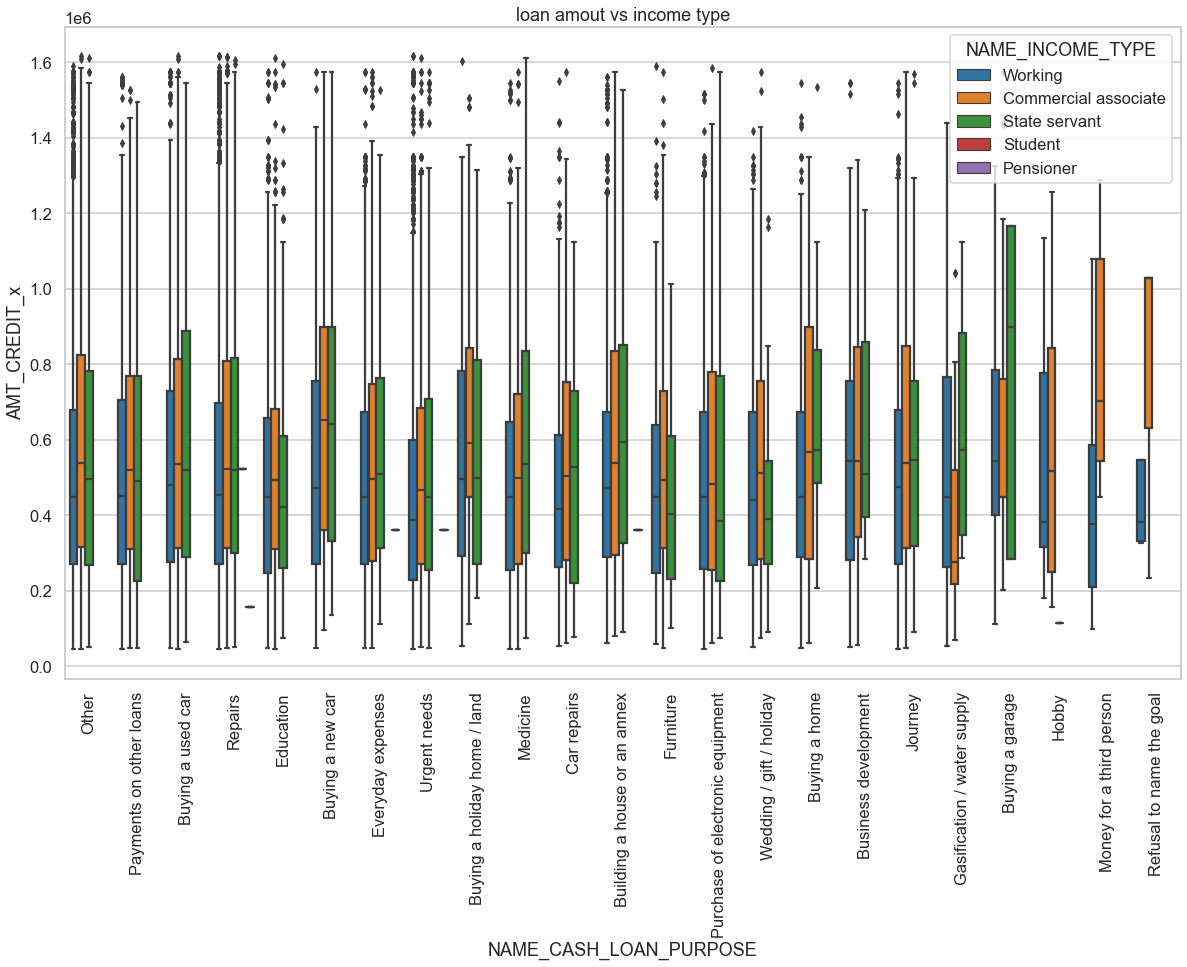

In [189]:
plt.figure(figsize =(20,12))
plt.xticks(rotation =90)
sns.boxplot(data =merged_dataset, x ='NAME_CASH_LOAN_PURPOSE', y = 'AMT_CREDIT_x', hue ='NAME_INCOME_TYPE' )
plt.title('loan amout vs income type')
plt.show()   

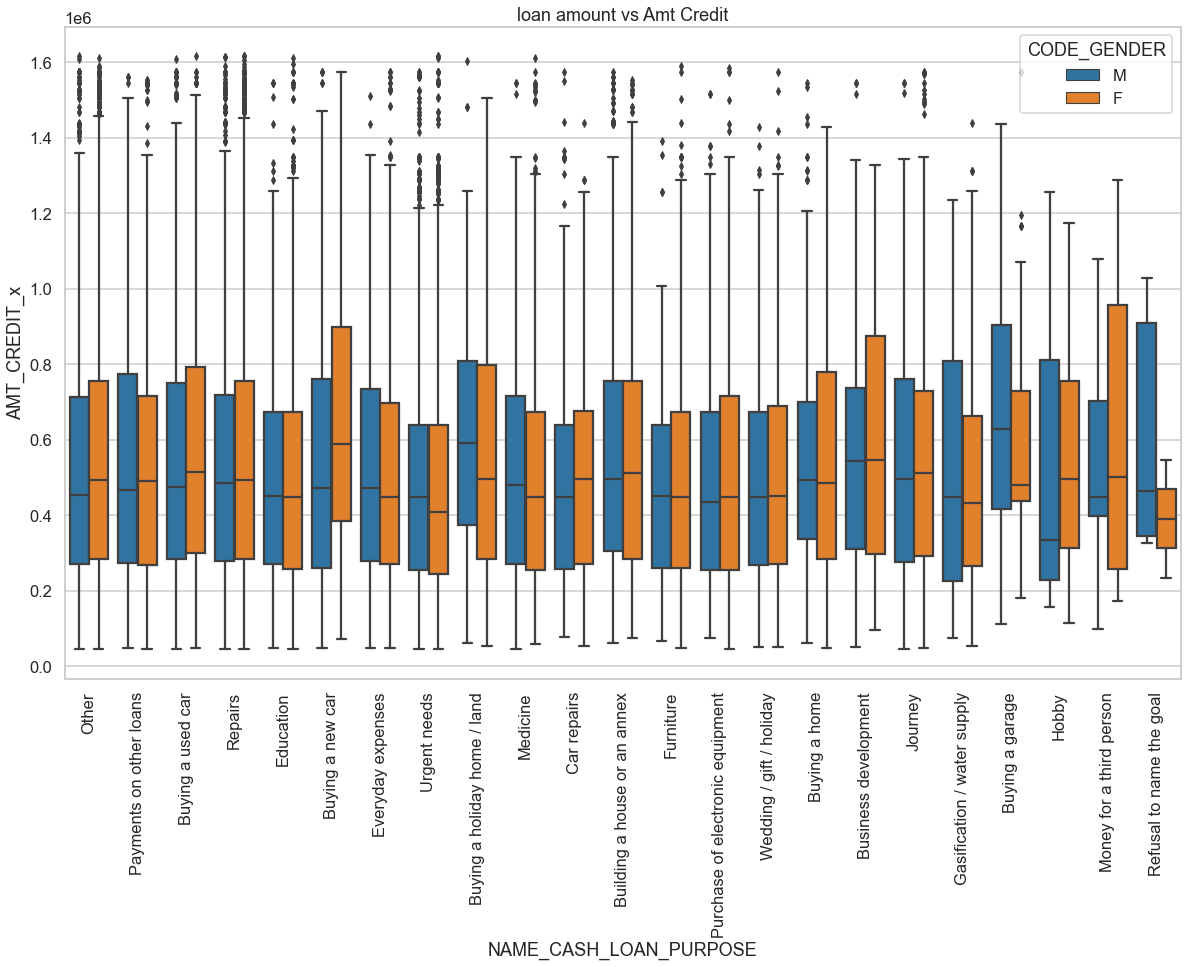

In [195]:
plt.figure(figsize =(20,12))
plt.xticks(rotation =90)
sns.boxplot(data =merged_dataset, x ='NAME_CASH_LOAN_PURPOSE',y ='AMT_CREDIT_x' , hue = 'CODE_GENDER')
plt.title('loan amount vs Amt Credit')
plt.show()

In [191]:
merged_dataset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
89      100034       0      Revolving loans           M            N   
100     100035       0           Cash loans           F            N   
126     100039       0           Cash loans           M            Y   
141     100046       0      Revolving loans           M            Y   
142     100046       0      Revolving loans           M            Y   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
89                Y             0           90000.0      180000.0   
100               Y             0          292500.0      665892.0   
126               N             1          360000.0      733315.5   
141               Y             0          180000.0      540000.0   
142               Y             0          180000.0      540000.0   

     AMT_ANNUITY_x      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
89          9000.0               Working               Higher education   
100        24592.5  Commercial associate  Secondary / secondary special   
126        39069.0  Commercial associate  Secondary / secondary special   
141        27000.0               Working               Higher education   
142        27000.0               Working               Higher education   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
89   Single / not married       With parents                    0.030755   
100        Civil marriage  House / apartment                    0.025164   
126               Married  House / apartment                    0.015221   
141               Married  House / apartment                    0.025164   
142               Married  House / apartment                    0.025164   

     Birth_day  Emp_date   Reg_year  Publish_id OCCUPATION_TYPE  \
89   28.331507  2.767123  13.147945    8.260274        Laborers   
100  41.863014  7.309589  14.427397   10.375342          Others   
126  32.038356  5.643836   9.745205    9.745205         Drivers   
141  44.180822  4.824658  22.564384   11.758904        Managers   
142  44.180822  4.824658  22.564384   11.758904        Managers   

    WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
89                       TUESDAY                         16   
100                    WEDNESDAY                         13   
126                     THURSDAY                         10   
141                      TUESDAY                          8   
142                      TUESDAY                          8   

     REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
89                            0                           0   
100                           0                           0   
126                           0                           0   
141                           0                           0   
142                           0                           0   

     LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
89                             0                       0   
100                            0                       0   
126                            0                       1   
141                            0                       0   
142                            0                       0   

     REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
89                        0                        0  Business Entity Type 3   
100                       0                        0  Business Entity Type 3   
126                       1                        0           Self-employed   
141                       0                        0  Business Entity Type 3   
142                       0                        0  Business Entity Type 3   

    AMT_INCOME_RANGE AMT_CREDIT_RANGE  SK_ID_PREV NAME_CONTRACT_TYPE_y  \
89      75000,100000    150000-200000     1390369           Cash loans   
100    275000-300000    650000-700000     1344613           Cash loans   
126    350000-375000   

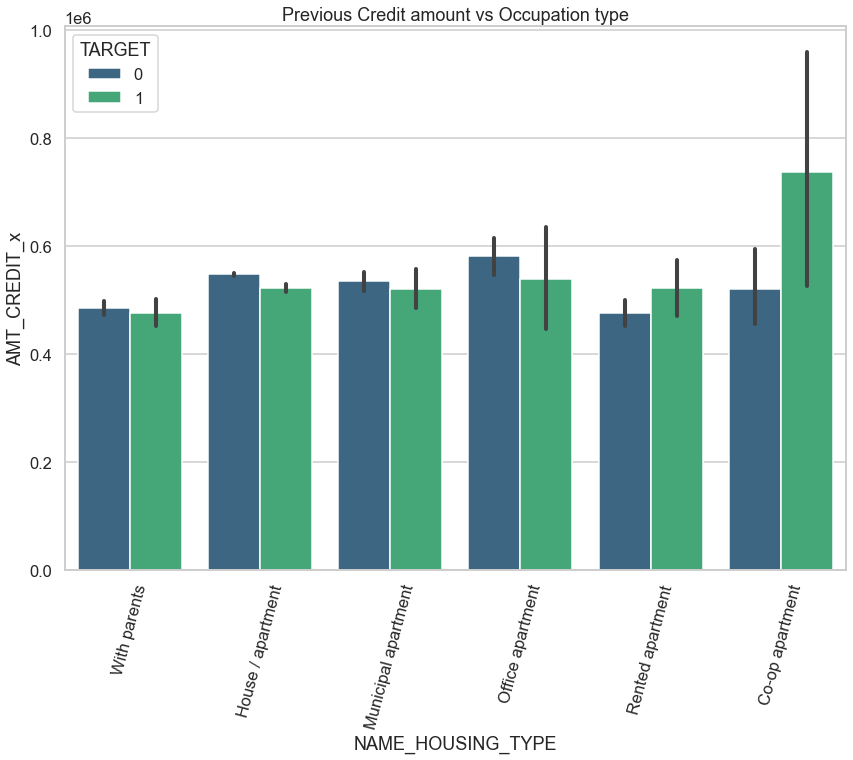

In [192]:
# Box plotting for Credit amount prev vs Education type

plt.figure(figsize=(14,10))
plt.xticks(rotation=75)
sns.barplot(data =merged_dataset, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette = 'viridis')
plt.title('Previous Credit amount vs Occupation type')
plt.show()

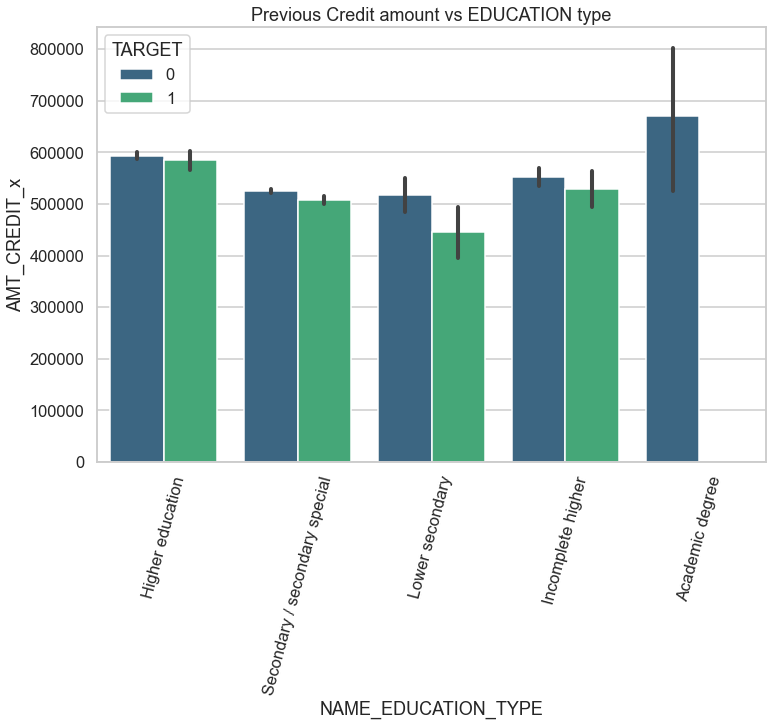

In [193]:
# Box plotting for Credit amount prev vs Education type

plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
sns.barplot(data =merged_dataset, y='AMT_CREDIT_x',hue='TARGET',x='NAME_EDUCATION_TYPE', palette = 'viridis')
plt.title('Previous Credit amount vs EDUCATION type')
plt.show()

##Conclusion:

- In Genders,'Females' are more in number for applying loans

- Banks should focus on 'Students' ,'Pensioner' for successful repayments

- Loan Purpose on 'Repair' having highest number of unsuccessful repayments

- Housing Type 'With Parents' having least number of unsuccesful repayments.

- Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments

- NAME_EDUCATION_TYPE 'Academic degree' has 0 numbers of unsuccesfull repayments

- Housing type 'office appartment' is having higher credit of target 0 and 'co-op apartment' is having higher credit of target 1

- NAME_CASH_LOAN_PURPOSE 'Working ','cormmerical associate' and 'state servant' has taken the most loan for various reasons as compare it to student and pensioners

- Most loan has applied by the repeaters who has already been with the bank

- NAME_CONTRACT_STATUS on 'Repair' having highest number of Contract status of previous applicatios